# Проект МО. Интернет-магазин "В Один Клик"

## Описание проекта 

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных 

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

id — номер покупателя в корпоративной базе данных.

Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

Тип сервиса — уровень сервиса, например «премиум» и «стандарт».

Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.

Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.

Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.

Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.

Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


Данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

id — номер покупателя в корпоративной базе данных.

Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

Выручка — сумма выручки за период.

Данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

id — номер покупателя в корпоративной базе данных.

Прибыль — значение прибыли.

##  Загрузка данных

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
#Устанавливаем нужные библиотеки, что бы импортировать функции
!pip install yellowbrick
!pip install phik
!pip install shap
!pip install optuna
!pip install mlxtend
!pip install imbalanced-learn

     |████████████████████████████████| 282 kB 277 kB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 1.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 679 kB 990 kB/s eta 0:00:01
     |████████████████████████████████| 532 kB 321 kB/s eta 0:00:01
     |████████████████████████████████| 409 kB 939 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 988 kB/s eta 0:00:01
     |████████████████████████████████| 235 kB 978 kB/s eta 0:00:01


In [4]:
#Испортипуем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import spearmanr
import shap,sklearn,phik,optuna,imblearn
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder, LabelEncoder, PolynomialFeatures, LabelEncoder, OrdinalEncoder
from sklearn.metrics import recall_score, accuracy_score,make_scorer, confusion_matrix, f1_score,fbeta_score, roc_curve, RocCurveDisplay, ConfusionMatrixDisplay, roc_auc_score
from sklearn.feature_selection import f_classif, mutual_info_classif,SelectKBest  
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from phik.report import plot_correlation_matrix
from imblearn.over_sampling import RandomOverSampler
from optuna import distributions,visualization
from optuna.integration import OptunaSearchCV
from mlxtend.plotting import plot_decision_regions
from itertools import combinations

In [5]:
#загружаем данные
df_market_file = pd.read_csv('/datasets/market_file.csv')
df_market_file

id Покупательская активность Тип сервиса Разрешить сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась   стандартт                нет   
3     215351                 Снизилась   стандартт                 да   
4     215352                 Снизилась   стандартт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    3.4                     5           121   
1                    4.4                     4           819   
2                    4.9                     3           539   
3                    3.2                     5           896   
4                    5.1                     3          1064   
...                  ...                   ...           ...   
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.00                Товары для детей   
1                  0.75                Товары для детей   
2                  0.14               Домашний текстиль   
3                  0.99                Товары для детей   
4                  0.94                Товары для детей   
...                 ...                             ...   
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       6                                   2   
1                                       4                                   4   
2                                       5                                   2   
3                                       5                                   0   
4                                       3                                   2   
...                                   ...                                 ...   
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  
0                  1                 5  
1                  2                 5  
2                  1                 5  
3                  6                 4  
4                  3                 2  
...              ...               ...  
1295               3                11  
1296               3                 9  
1297               5                 7  
1298               5                 7  
1299               3                12  

[1300 rows x 13 columns]

In [6]:
#Выводим информацию о датафрейме
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
#загружаем данные
df_market_money = pd.read_csv('/datasets/market_money.csv')
df_market_money

id               Период  Выручка
0     215348  препредыдущий_месяц      0.0
1     215348        текущий_месяц   3293.1
2     215348     предыдущий_месяц      0.0
3     215349  препредыдущий_месяц   4472.0
4     215349        текущий_месяц   4971.6
...      ...                  ...      ...
3895  216646  препредыдущий_месяц   4725.0
3896  216646     предыдущий_месяц   4923.0
3897  216647     предыдущий_месяц   4720.0
3898  216647  препредыдущий_месяц   5183.0
3899  216647        текущий_месяц   4448.3

[3900 rows x 3 columns]

In [8]:
#Выводим информацию о датафрейме
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [9]:
#загружаем данные
df_market_time = pd.read_csv('/datasets/market_time.csv')
df_market_time

id            Период  минут
0     215348     текущий_месяц     14
1     215348  предыдцщий_месяц     13
2     215349     текущий_месяц     10
3     215349  предыдцщий_месяц     12
4     215350     текущий_месяц     13
...      ...               ...    ...
2595  216645     текущий_месяц     18
2596  216646  предыдцщий_месяц     18
2597  216646     текущий_месяц      7
2598  216647     текущий_месяц     10
2599  216647  предыдцщий_месяц     15

[2600 rows x 3 columns]

In [10]:
#Выводим информацию о датафрейме
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [11]:
#загружаем данные
df_money_else = pd.read_csv('/datasets/money.csv',sep=';',decimal=',',index_col=0)
df_money_else

Прибыль
id             
215348     0.98
215349     4.16
215350     3.13
215351     4.87
215352     4.21
...         ...
216643     4.44
216644     6.11
216645     3.29
216646     4.03
216647     3.28

[1300 rows x 1 columns]

In [12]:
#Выводим информацию о датафрейме
df_money_else.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Прибыль  1300 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


## Предобработка данных 

In [13]:
df_market_file.columns = df_market_file.columns.str.replace(' ', '_')

In [14]:
df_market_file

id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась   стандартт                нет   
3     215351                 Снизилась   стандартт                 да   
4     215352                 Снизилась   стандартт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    3.4                     5           121   
1                    4.4                     4           819   
2                    4.9                     3           539   
3                    3.2                     5           896   
4                    5.1                     3          1064   
...                  ...                   ...           ...   
1295                 6.6                     3           318   
1296                 5.1                     4           454   
1297                 4.1                     3           586   
1298                 6.3                     5           645   
1299                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.00                Товары для детей   
1                  0.75                Товары для детей   
2                  0.14               Домашний текстиль   
3                  0.99                Товары для детей   
4                  0.94                Товары для детей   
...                 ...                             ...   
1295               0.24  Техника для красоты и здоровья   
1296               0.21               Домашний текстиль   
1297               0.20               Домашний текстиль   
1298               0.12  Техника для красоты и здоровья   
1299               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       6                                   2   
1                                       4                                   4   
2                                       5                                   2   
3                                       5                                   0   
4                                       3                                   2   
...                                   ...                                 ...   
1295                                    5                                   3   
1296                                    6                                   2   
1297                                    3                                   2   
1298                                    3                                   3   
1299                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  
0                  1                 5  
1                  2                 5  
2                  1                 5  
3                  6                 4  
4                  3                 2  
...              ...               ...  
1295               3                11  
1296               3                 9  
1297               5                 7  
1298               5                 7  
1299               3                12  

[1300 rows x 13 columns]

In [16]:
df_market_file['Тип_сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: Тип_сервиса, dtype: int64

In [17]:
print(df_market_file.query('Тип_сервиса=="стандартт"'))

         id Покупательская_активность Тип_сервиса Разрешить_сообщать  \
2    215350                 Снизилась   стандартт                нет   
3    215351                 Снизилась   стандартт                 да   
4    215352                 Снизилась   стандартт                нет   
5    215353                 Снизилась   стандартт                 да   
6    215354                 Снизилась   стандартт                 да   
7    215355                 Снизилась   стандартт                нет   
8    215356                 Снизилась   стандартт                 да   
9    215357                 Снизилась   стандартт                 да   
10   215358                 Снизилась   стандартт                 да   
400  215748           Прежний уровень   стандартт                нет   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
2                   4.9                     3           539   
3                   3.2                     5           896   
4                 

In [18]:
df_market_file['Тип_сервиса'] = df_market_file['Тип_сервиса'].str.replace('тт', 'т')

In [19]:
df_market_file['Тип_сервиса'].head()

0     премиум
1     премиум
2    стандарт
3    стандарт
4    стандарт
Name: Тип_сервиса, dtype: object

In [20]:
df_market_file['Тип_сервиса']

0        премиум
1        премиум
2       стандарт
3       стандарт
4       стандарт
          ...   
1295    стандарт
1296    стандарт
1297    стандарт
1298    стандарт
1299     премиум
Name: Тип_сервиса, Length: 1300, dtype: object

In [21]:
#Проверяем пропуски
df_market_file.isna().sum()

id                                     0
Покупательская_активность              0
Тип_сервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

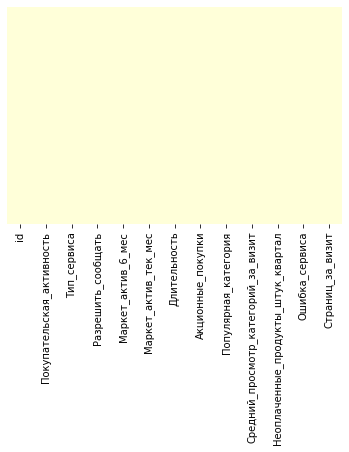

In [22]:
sns.heatmap(df_market_file.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

In [23]:
#Проверяем пропуски
df_market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

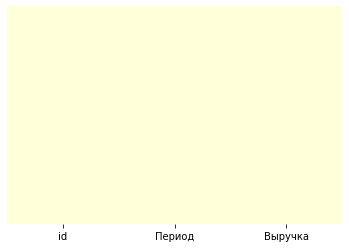

In [24]:
sns.heatmap(df_market_money.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

In [25]:
#Проверяем пропуски
df_market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

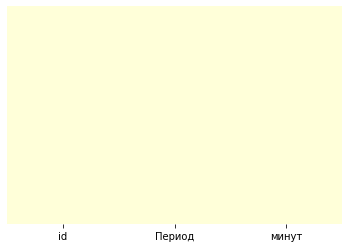

In [26]:
sns.heatmap(df_market_time.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

In [27]:
#Проверяем пропуски
df_money_else.isna().sum()

Прибыль    0
dtype: int64

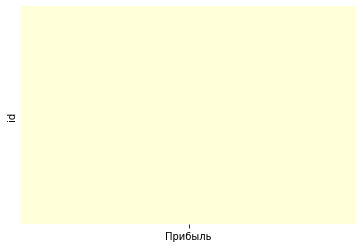

In [28]:
sns.heatmap(df_money_else.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

In [29]:
#Выводим дубликаты в датафреймах
df_market_file.duplicated().sum()

0

In [30]:
df_market_file['id'].value_counts()

215348    1
216202    1
216220    1
216219    1
216218    1
         ..
215779    1
215778    1
215777    1
215776    1
216647    1
Name: id, Length: 1300, dtype: int64

In [31]:
#Выводим дубликаты в датафреймах
df_market_money.duplicated().sum()

0

In [32]:
df_market_money['id'].value_counts()

215349    3
215756    3
215792    3
215790    3
215788    3
         ..
216211    3
216209    3
216207    3
216205    3
216646    3
Name: id, Length: 1300, dtype: int64

In [33]:
#Выводим дубликаты в датафреймах
df_market_time.duplicated().sum()

0

In [34]:
df_market_time['id'].value_counts()

215349    2
215756    2
215792    2
215790    2
215788    2
         ..
216211    2
216209    2
216207    2
216205    2
216646    2
Name: id, Length: 1300, dtype: int64

In [35]:
#Выводим дубликаты в датафреймах
df_money_else.duplicated().sum()

900

In [36]:
df_money_else[df_money_else.duplicated()]

Прибыль
id             
215378     3.03
215381     3.62
215383     4.27
215412     1.63
215415     3.40
...         ...
216641     4.50
216643     4.44
216645     3.29
216646     4.03
216647     3.28

[900 rows x 1 columns]

## Вывод

Загрузила данные. В датафрейме df_money заменила тип данных 'Прибыль' на float.

Во всех датафреймах нет пропусков.

Есть дупликаты по столбцам, но их не удаляем, по скольку это данные о разных покупателях.

## Исследовательский анализ данных 

In [37]:
df_market_hist = df_market_file[['Покупательская_активность','Маркет_актив_6_мес','Маркет_актив_тек_мес','Длительность','Акционные_покупки',
                               'Средний_просмотр_категорий_за_визит','Неоплаченные_продукты_штук_квартал',
                                'Ошибка_сервиса','Страниц_за_визит']].copy()
df_market_hist.head()

Покупательская_активность  Маркет_актив_6_мес  Маркет_актив_тек_мес  \
0                 Снизилась                 3.4                     5   
1                 Снизилась                 4.4                     4   
2                 Снизилась                 4.9                     3   
3                 Снизилась                 3.2                     5   
4                 Снизилась                 5.1                     3   

   Длительность  Акционные_покупки  Средний_просмотр_категорий_за_визит  \
0           121               0.00                                    6   
1           819               0.75                                    4   
2           539               0.14                                    5   
3           896               0.99                                    5   
4          1064               0.94                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [38]:
df_market_histcat = df_market_file[['Покупательская_активность','Тип_сервиса','Разрешить_сообщать',
                                   'Популярная_категория']]
df_market_histcat.head()

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
0                 Снизилась     премиум                 да   
1                 Снизилась     премиум                 да   
2                 Снизилась    стандарт                нет   
3                 Снизилась    стандарт                 да   
4                 Снизилась    стандарт                нет   

  Популярная_категория  
0     Товары для детей  
1     Товары для детей  
2    Домашний текстиль  
3     Товары для детей  
4     Товары для детей

In [39]:
fig = px.bar(data_frame =df_market_histcat, x='Покупательская_активность', y=['Тип_сервиса', 'Разрешить_сообщать','Популярная_категория'],
             title='Покупательская_активность',barmode = 'group')
fig.show()

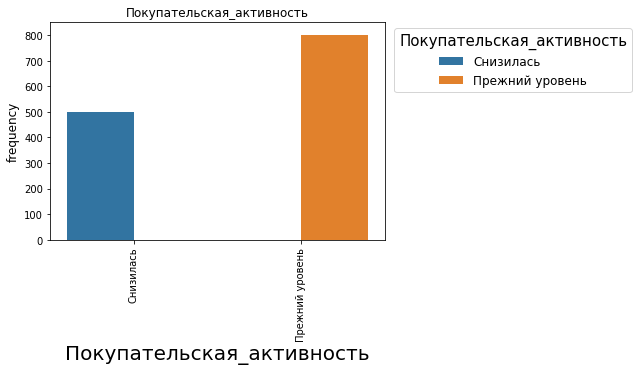

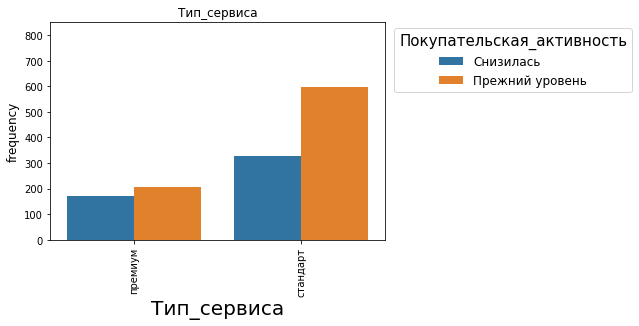

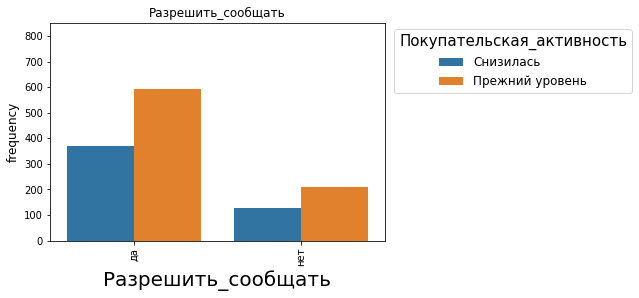

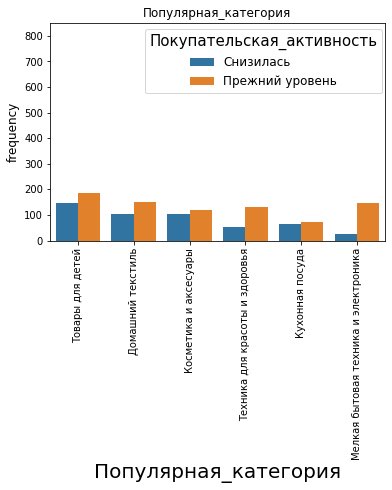

In [40]:
#Получаем графики по данным
for i, col in enumerate(df_market_histcat.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df_market_histcat, hue='Покупательская_активность')
    plt.ylim(0,850)
    plt.xticks(rotation='vertical')
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col, fontsize = 20)
    plt.title(col, fontsize=12)
    plt.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), \
               title="Покупательская_активность", \
               title_fontsize = 15);
    plt.show()

В категориальных признаках в основном у клиентов активность в большинстве случаев на прежнем уровне,самая популярная котегория "товары для детей", стандартная подписка,есть разрешение на сообщение о различных дополнительных предложениях.

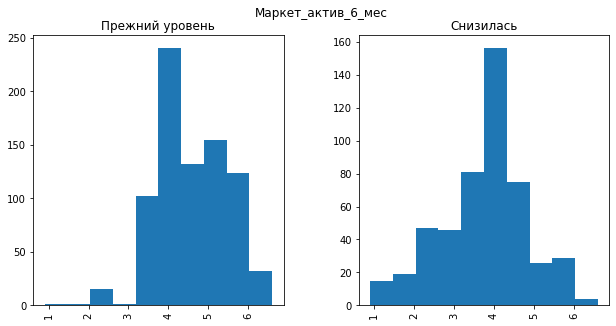

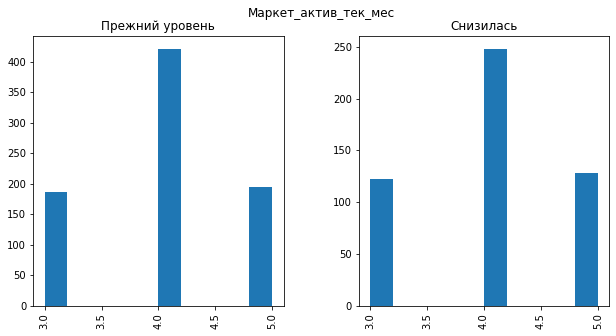

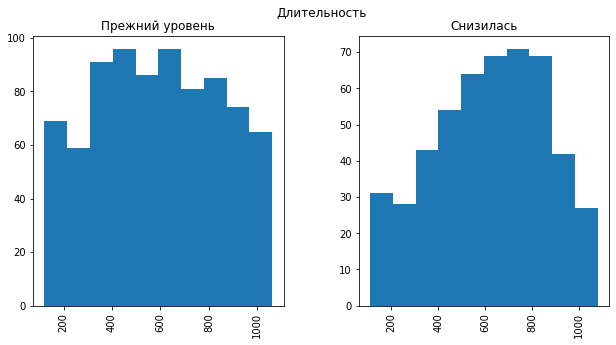

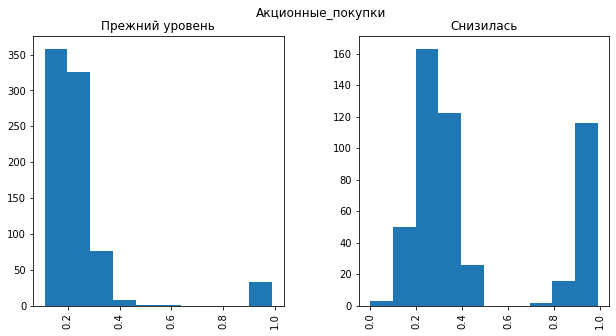

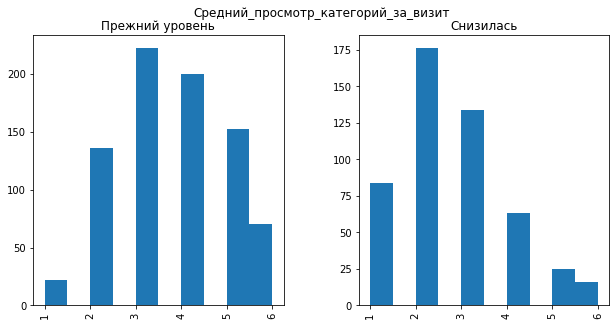

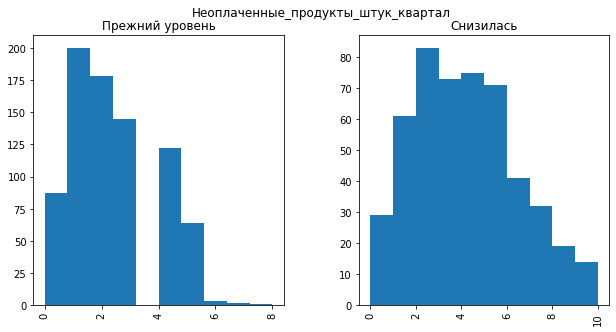

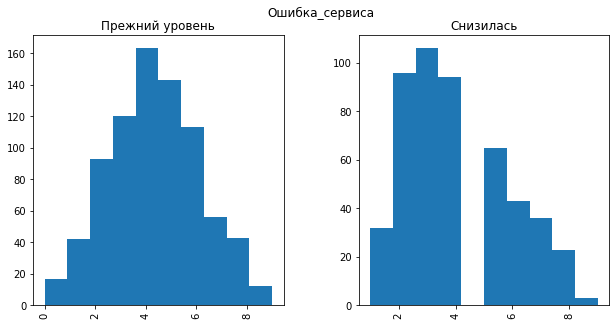

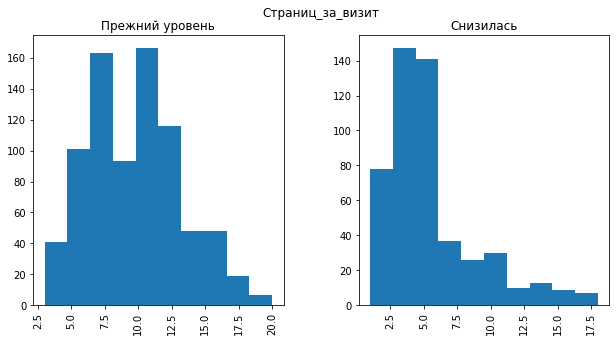

In [41]:
df_market_hist['Маркет_актив_6_мес'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Маркет_актив_6_мес')
plt.show()
df_market_hist['Маркет_актив_тек_мес'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Маркет_актив_тек_мес')
plt.show()
df_market_hist['Длительность'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Длительность')
plt.show()
df_market_hist['Акционные_покупки'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Акционные_покупки')
plt.show()
df_market_hist['Средний_просмотр_категорий_за_визит'].hist(by=df_market_hist['Покупательская_активность'],
                                                           bins=10,figsize=(10,5))
plt.suptitle('Средний_просмотр_категорий_за_визит')
plt.show()
df_market_hist['Неоплаченные_продукты_штук_квартал'].hist(by=df_market_hist['Покупательская_активность'],
                                                          bins=10,figsize=(10,5))
plt.suptitle('Неоплаченные_продукты_штук_квартал')
plt.show()
df_market_hist['Ошибка_сервиса'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Ошибка_сервиса')
plt.show()
df_market_hist['Страниц_за_визит'].hist(by=df_market_hist['Покупательская_активность'],bins=10,figsize=(10,5))
plt.suptitle('Страниц_за_визит')
plt.show()

По графикам можносказать у покупателей меньше стало менше марк. активности, акционные покупки, неоплаченных продуктов в карзине.

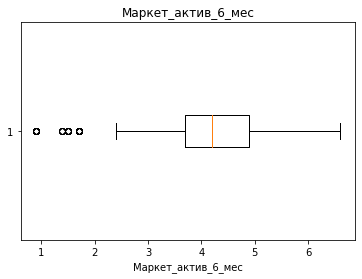

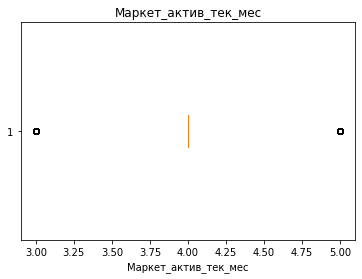

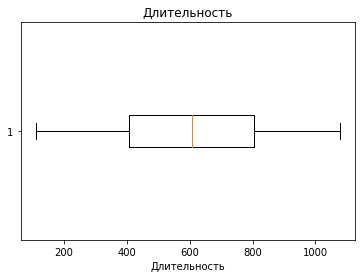

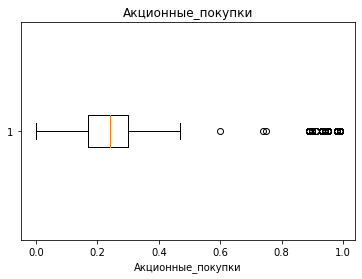

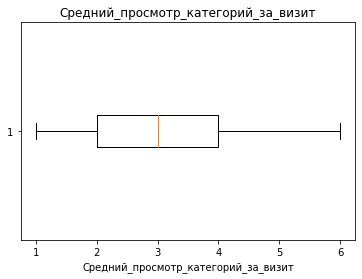

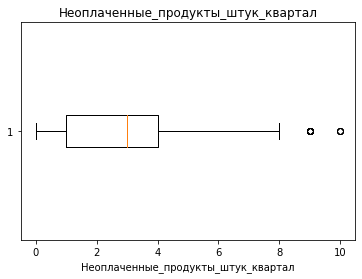

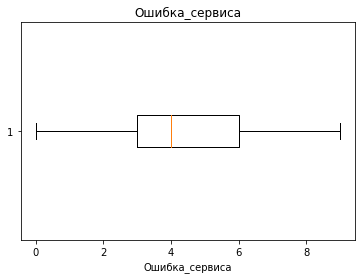

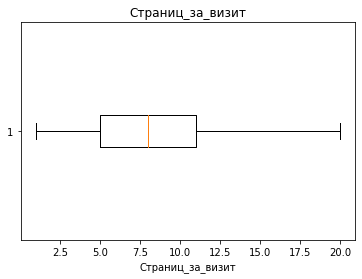

Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count         1300.000000           1300.000000   1300.000000   
mean             4.253769              4.011538    601.898462   
std              1.014814              0.696868    249.856289   
min              0.900000              3.000000    110.000000   
25%              3.700000              4.000000    405.500000   
50%              4.200000              4.000000    606.000000   
75%              4.900000              4.000000    806.000000   
max              6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

In [42]:
#Получаем график ящик с усами
for col in df_market_hist.drop('Покупательская_активность',axis=1).columns:
    plt.boxplot(df_market_hist[col], vert=False)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()
    
df_market_hist.describe()

 В основном  маркет_активность в последние 6 месяцев(в графике есть несколько пиков) и на текущем месяце немного снизился, длительность в среднем 600 дней с момента регистрации, акционные покупки составляют 24% от общего числа покупок, средний просмор от в среднем 3 категории, неоплаченные продукты в карзине от 3, ошибка сервиса в среднем 4 раза за визит, за один визит просмотривают в среднем 8 страниц.

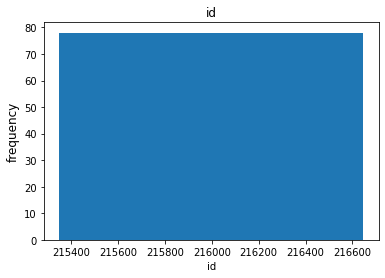

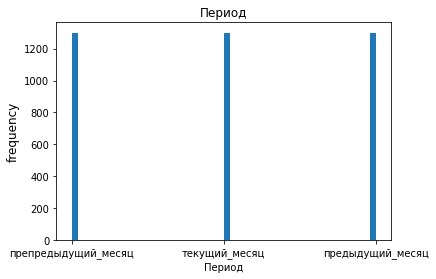

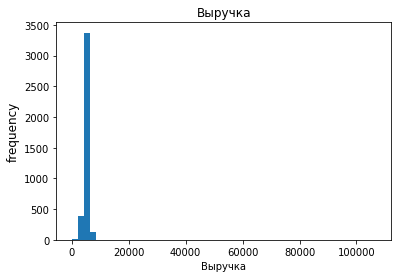

In [43]:
#Получаем графики по данным
for col in df_market_money.columns:
    plt.hist(df_market_money[col], bins=50)
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()

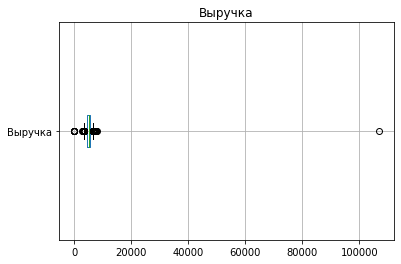

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

In [44]:
#Получаем график ящик с усами
df_market_money.boxplot('Выручка', vert=False);
plt.title('Выручка', fontsize=12)
plt.show()
df_market_money['Выручка'].describe()

В признаке выручка есть выбросы. Минимальная покупка состовляет 0р. макс 106862р.

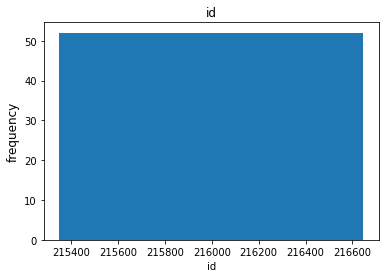

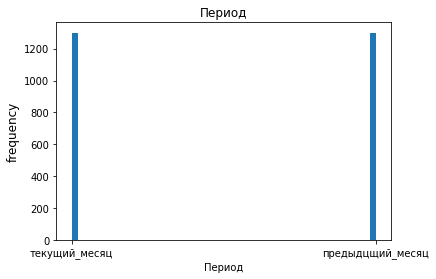

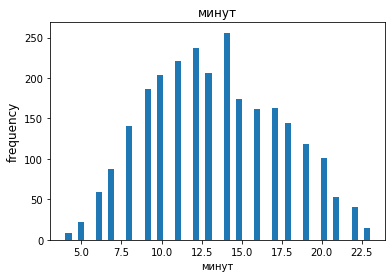

In [46]:
#Получаем графики по данным
for col in df_market_time.columns:
    plt.hist(df_market_time[col], bins=50)
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()

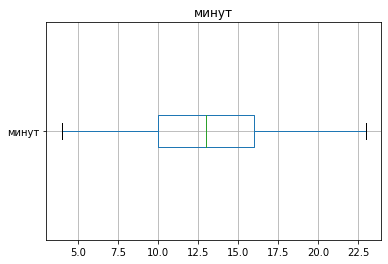

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [47]:
#Получаем график ящик с усами
df_market_time.boxplot('минут', vert=False);
plt.title('минут', fontsize=12)
plt.show()
df_market_time['минут'].describe()

Выбросов нет. Распределение нормальное.

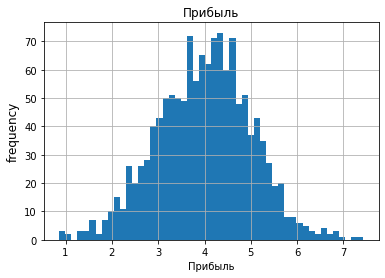

In [48]:
#Получаем графики по данным
df_money_else.hist(bins=50)
plt.ylabel('frequency', fontsize=12)
plt.xlabel('Прибыль')
plt.title('Прибыль', fontsize=12)
plt.show()

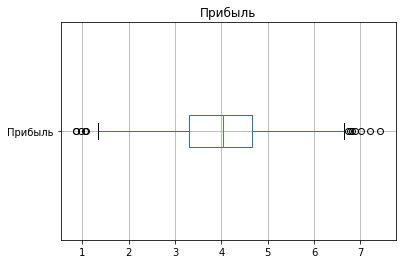

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

In [49]:
#Получаем график ящик с усами
df_money_else.boxplot( vert=False)
plt.title('Прибыль', fontsize=12)
plt.show()
df_money_else['Прибыль'].describe()

In [50]:
#Отбераем клиентов с покупательской активностью не менее трёх месяцев
#Создаём новые датафреймы на этих данных
df_market_money_pivot = df_market_money.pivot_table(index='id',columns='Период',values='Выручка')
more_three_months = df_market_money_pivot[(df_market_money_pivot['препредыдущий_месяц'] != 0) & 
                                  (df_market_money_pivot['предыдущий_месяц'] != 0) & 
                                  (df_market_money_pivot['текущий_месяц'] != 0)].index.to_list()
df_market_money_act = df_market_money[df_market_money['id'].isin(more_three_months)]
df_market_file_act = df_market_file[df_market_file['id'].isin(more_three_months)]
df_market_time_act = df_market_time[df_market_time['id'].isin(more_three_months)]
print(df_market_money_act.shape)
print(df_market_file_act.shape)
print(df_market_time_act.shape)

(3891, 3)
(1297, 13)
(2594, 3)


В некоторых признаках есть выбросы данных. пока что их не буду удалять выбросы.Во время МО можно выбрать метрику каторая более устойчива к выбросам.

## Объединение таблиц 

In [51]:
#Проверяем совподают ли все клиенты по новым данным
df_market_money_act['id'][~df_market_money_act['id'].isin(df_market_file_act['id'])]

Series([], Name: id, dtype: int64)

In [52]:
#Проверяем совподают ли все клиенты по новым данным
df_market_money_act['id'][~df_market_money_act['id'].isin(df_market_time_act['id'])]

Series([], Name: id, dtype: int64)

In [53]:
#Задаём id в качестве индекса и соединяем датафреймы
df_market_money_act = df_market_money_act.set_index('id')
df_market_file_act = df_market_file_act.set_index('id')
df_market_time_act = df_market_time_act.set_index('id')

In [54]:
df_market_file_act.shape

(1297, 12)

In [55]:
#Делим на отдельные столбец для каждого периода
df_money = df_market_money_act.pivot_table(index='id',columns=['Период'], values=['Выручка'])
df_money.columns = ['предыдущий_месяц_в', 'препредыдущий_месяц_в', 'текущий_месяц_в']
df_money

предыдущий_месяц_в  препредыдущий_месяц_в  текущий_месяц_в
id                                                                
215349              5216.0                 4472.0           4971.6
215350              5457.5                 4826.0           5058.4
215351              6158.0                 4793.0           6610.4
215352              5807.5                 4594.0           5872.5
215353              4738.5                 5124.0           5388.5
...                    ...                    ...              ...
216643              3664.0                 4704.0           4741.7
216644              4729.0                 5299.0           5353.0
216645              5160.0                 5334.0           5139.2
216646              4923.0                 4725.0           5224.6
216647              4720.0                 5183.0           4448.3

[1297 rows x 3 columns]

In [56]:
df_minute = df_market_time_act.pivot_table(index='id',columns=['Период'], values=['минут'])
df_minute.columns = ['предыдущий_месяц_м','текущий_месяц_м']
df_minute

предыдущий_месяц_м  текущий_месяц_м
id                                         
215349                  12               10
215350                   8               13
215351                  11               13
215352                   8               11
215353                  10               10
...                    ...              ...
216643                  14                7
216644                  12               11
216645                  12               18
216646                  18                7
216647                  15               10

[1297 rows x 2 columns]

In [57]:
df = df_market_file_act.join(df_minute,on='id')
df

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   
...                          ...         ...                ...   
216643           Прежний уровень    стандарт                 да   
216644           Прежний уровень    стандарт                нет   
216645           Прежний уровень    стандарт                 да   
216646           Прежний уровень    стандарт                 да   
216647           Прежний уровень     премиум                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   
...                    ...                   ...           ...   
216643                 6.6                     3           318   
216644                 5.1                     4           454   
216645                 4.1                     3           586   
216646                 6.3                     5           645   
216647                 4.0                     5           906   

        Акционные_покупки            Популярная_категория  \
id                                                          
215349               0.75                Товары для детей   
215350               0.14               Домашний текстиль   
215351               0.99                Товары для детей   
215352               0.94                Товары для детей   
215353               0.26               Домашний текстиль   
...                   ...                             ...   
216643               0.24  Техника для красоты и здоровья   
216644               0.21               Домашний текстиль   
216645               0.20               Домашний текстиль   
216646               0.12  Техника для красоты и здоровья   
216647               0.94  Техника для красоты и здоровья   

        Средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   
...                                     ...   
216643                                    5   
216644                                    6   
216645                                    3   
216646                                    3   
216647                                    4   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   
...                                    ...             ...               ...   
216643                                   3               3                11   
216644                                   2               3                 9   
216645                                   2               5            

In [58]:
df_full = df.join(df_money,on='id')
df_full

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   
...                          ...         ...                ...   
216643           Прежний уровень    стандарт                 да   
216644           Прежний уровень    стандарт                нет   
216645           Прежний уровень    стандарт                 да   
216646           Прежний уровень    стандарт                 да   
216647           Прежний уровень     премиум                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   
...                    ...                   ...           ...   
216643                 6.6                     3           318   
216644                 5.1                     4           454   
216645                 4.1                     3           586   
216646                 6.3                     5           645   
216647                 4.0                     5           906   

        Акционные_покупки            Популярная_категория  \
id                                                          
215349               0.75                Товары для детей   
215350               0.14               Домашний текстиль   
215351               0.99                Товары для детей   
215352               0.94                Товары для детей   
215353               0.26               Домашний текстиль   
...                   ...                             ...   
216643               0.24  Техника для красоты и здоровья   
216644               0.21               Домашний текстиль   
216645               0.20               Домашний текстиль   
216646               0.12  Техника для красоты и здоровья   
216647               0.94  Техника для красоты и здоровья   

        Средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   
...                                     ...   
216643                                    5   
216644                                    6   
216645                                    3   
216646                                    3   
216647                                    4   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   
...                                    ...             ...               ...   
216643                                   3               3                11   
216644                                   2               3                 9   
216645                                   2               5            

## Вывод

Поменяла индекс таблиц на Id клиентов. Разделила столбец 'выручка' и 'минуты'. Соединила все датафреймы. 

##  Корреляционный анализ 

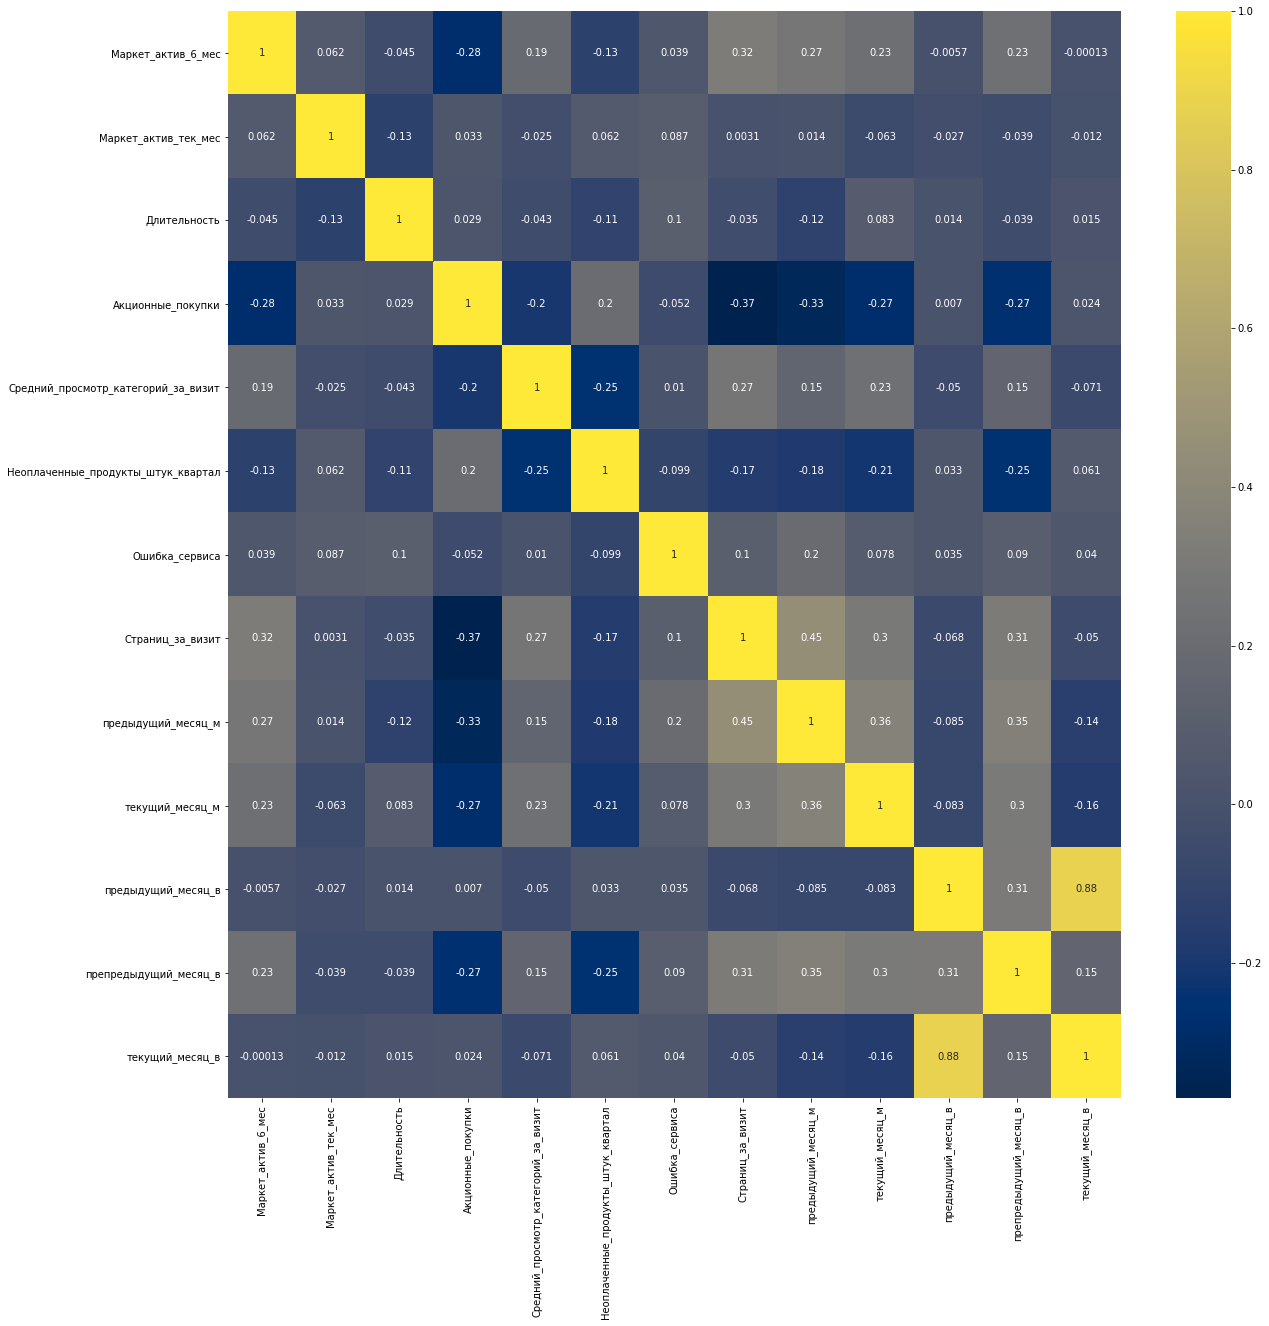

In [59]:
#Получаем кор.график по прзнакам
plt.figure(figsize=(20,20))
sns.heatmap(df_full.corr(method='spearman'),  annot=True, cmap='cividis');

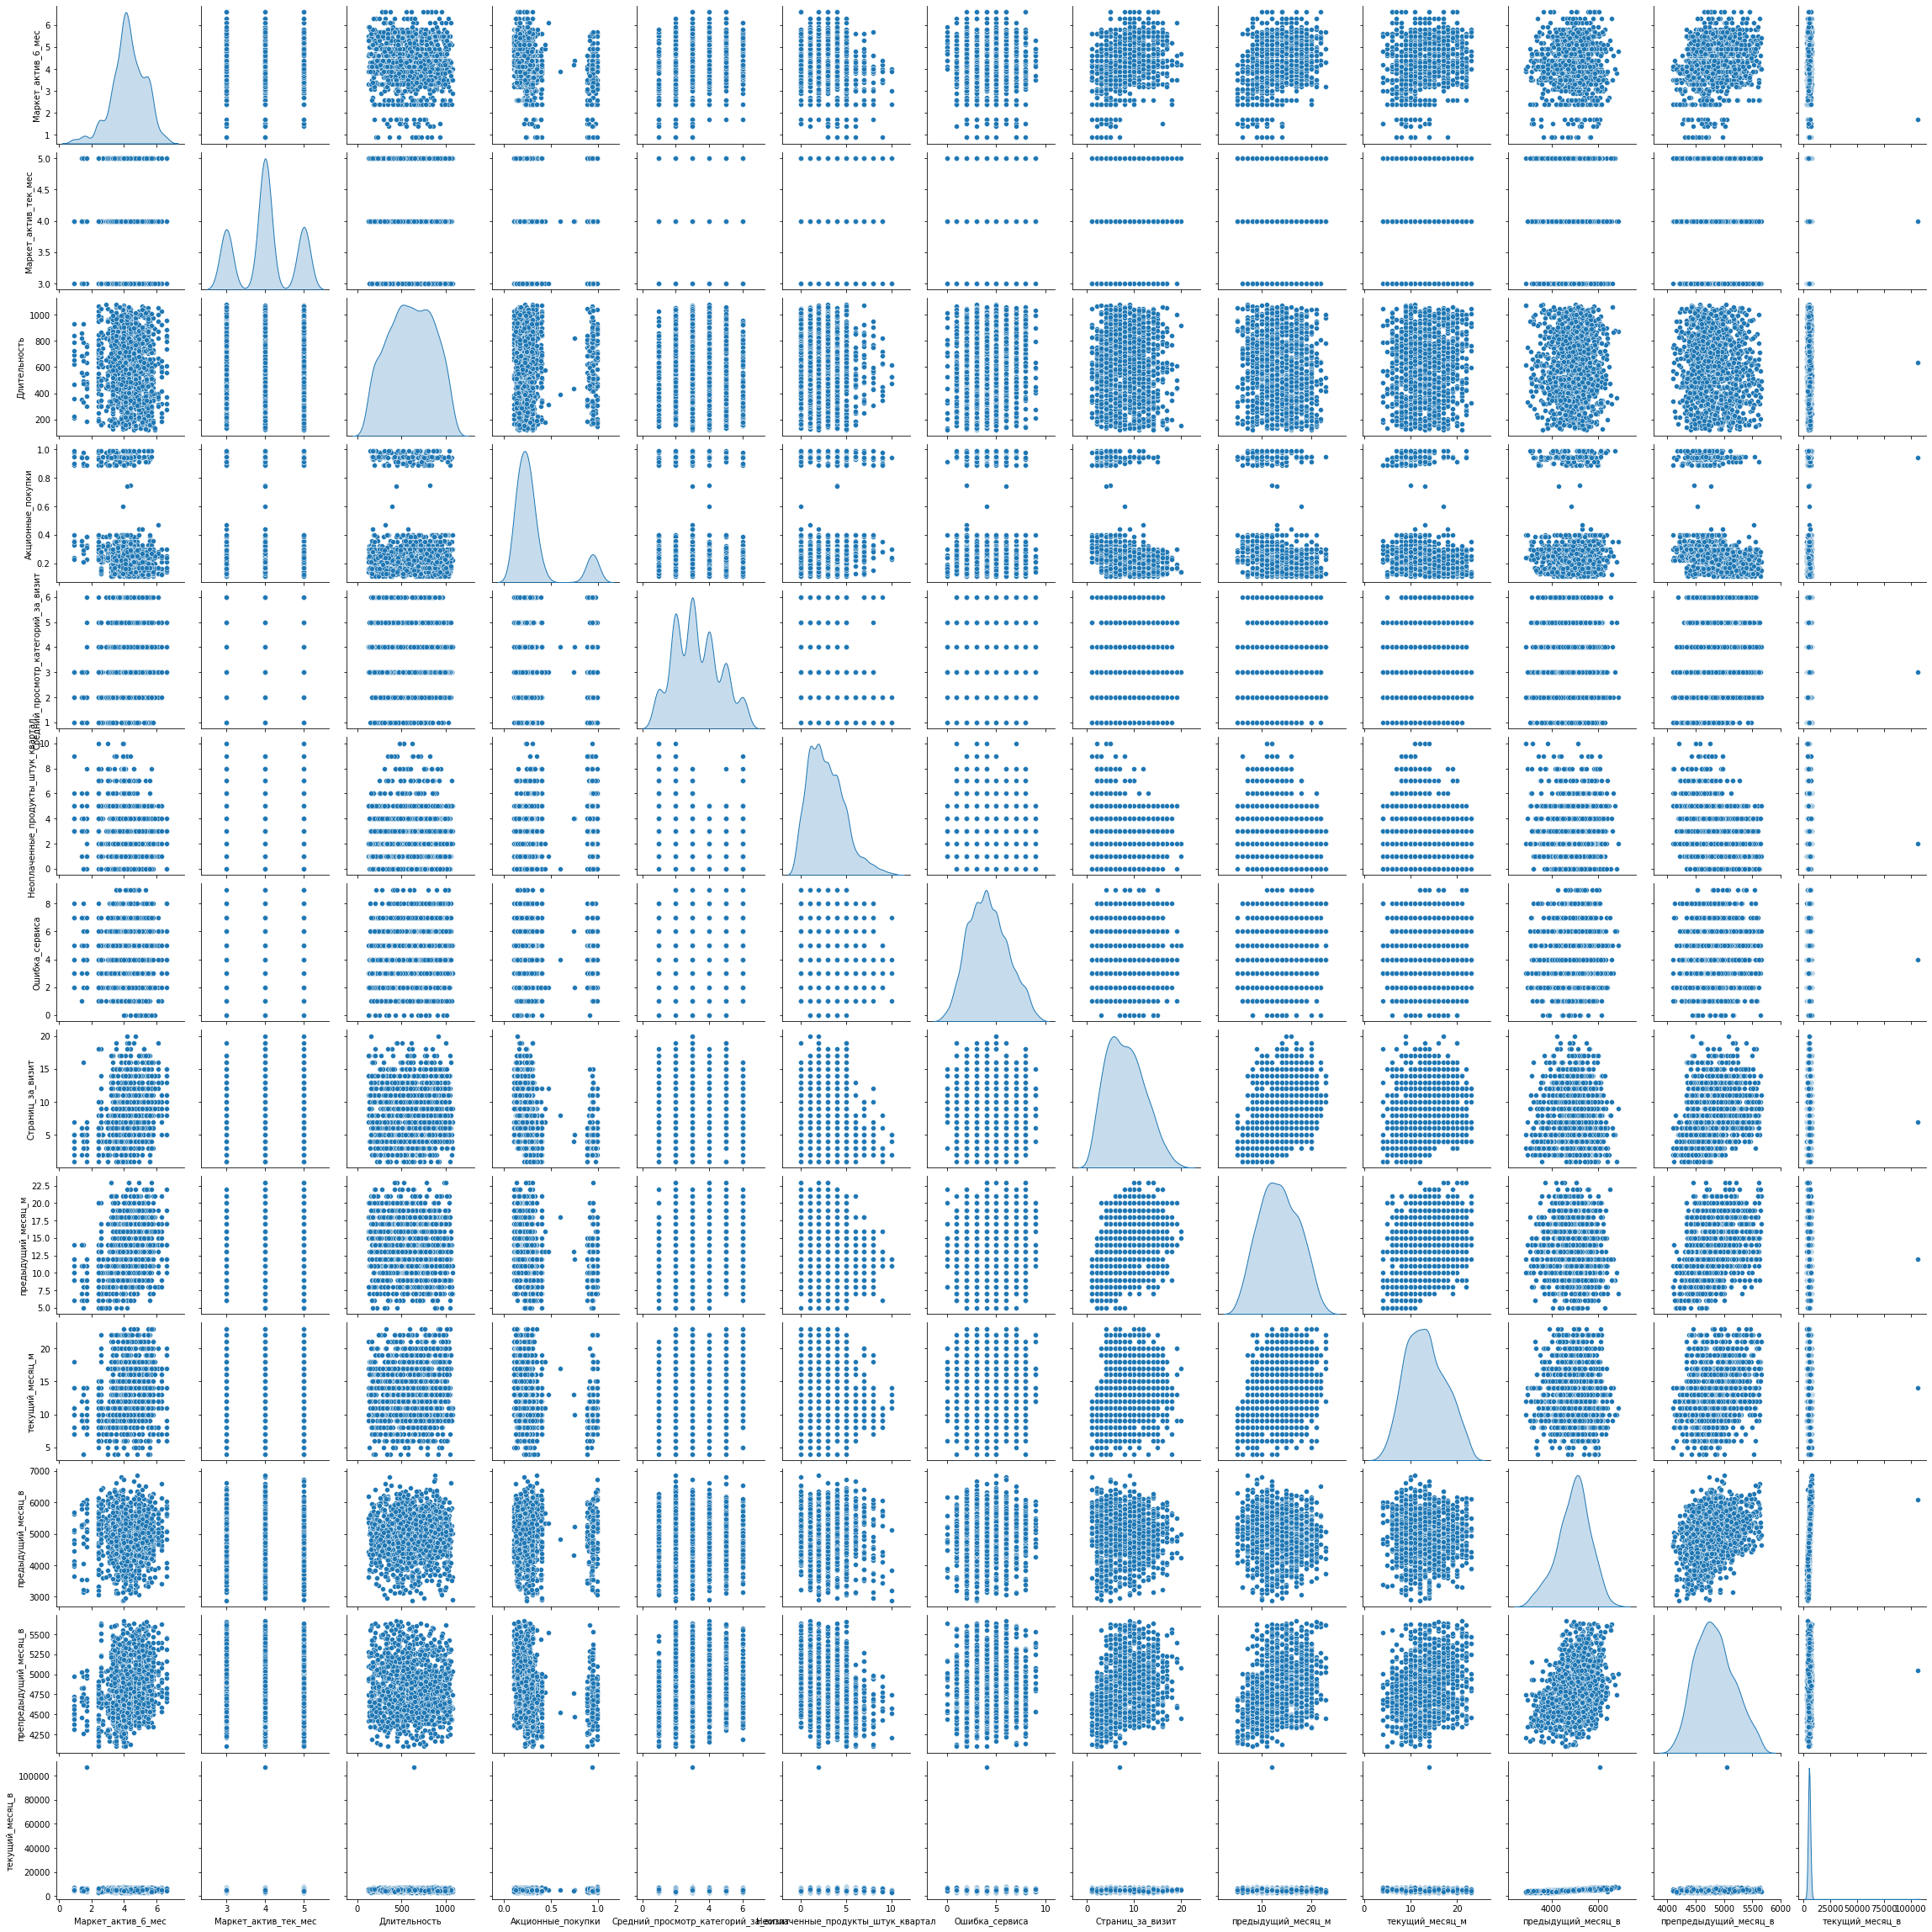

In [61]:
#Получаем кор.график по прзнакам
sns.pairplot(data=df_full, kind='scatter',diag_kind='kde');

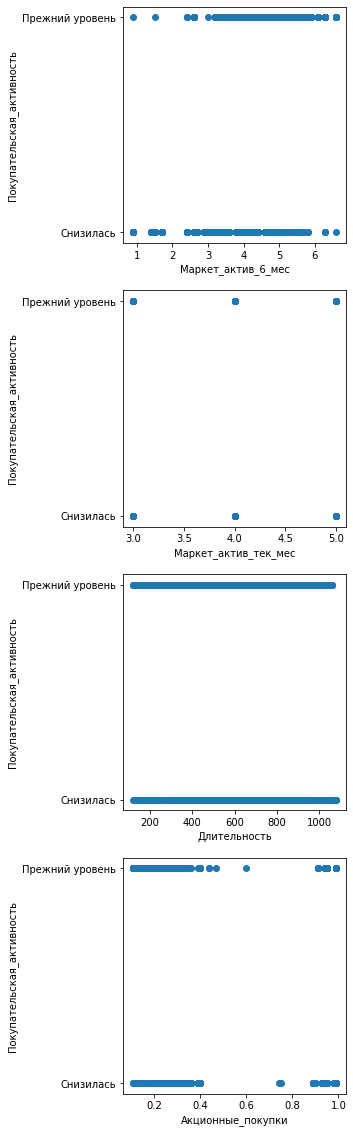

In [62]:
#Получаем кор.график по прзнакам
fig, ax = plt.subplots(4, figsize=(4,20))

ax[0].scatter(x = df_full['Маркет_актив_6_мес'], y = df_full['Покупательская_активность'])
ax[0].set_xlabel("Маркет_актив_6_мес")
ax[0].set_ylabel("Покупательская_активность")

ax[1].scatter(x = df_full['Маркет_актив_тек_мес'], y = df_full['Покупательская_активность'])
ax[1].set_xlabel("Маркет_актив_тек_мес")
ax[1].set_ylabel("Покупательская_активность")

ax[2].scatter(x = df_full['Длительность'], y = df_full['Покупательская_активность'])
ax[2].set_xlabel("Длительность")
ax[2].set_ylabel("Покупательская_активность")

ax[3].scatter(x = df_full['Акционные_покупки'], y = df_full['Покупательская_активность'])
ax[3].set_xlabel("Акционные_покупки")
ax[3].set_ylabel("Покупательская_активность")

plt.show();

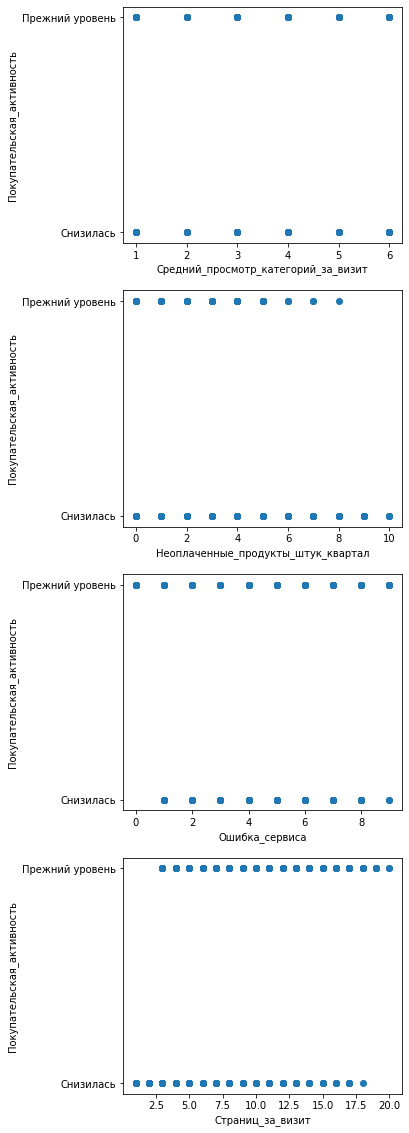

In [63]:
#Получаем кор.график по прзнакам
fig, ax = plt.subplots(4, figsize=(5,20))
ax[0].scatter(x = df_full['Средний_просмотр_категорий_за_визит'], y = df_full['Покупательская_активность'])
ax[0].set_xlabel("Средний_просмотр_категорий_за_визит")
ax[0].set_ylabel("Покупательская_активность")

ax[1].scatter(x = df_full['Неоплаченные_продукты_штук_квартал'], y = df_full['Покупательская_активность'])
ax[1].set_xlabel("Неоплаченные_продукты_штук_квартал")
ax[1].set_ylabel("Покупательская_активность")

ax[2].scatter(x = df_full['Ошибка_сервиса'], y = df_full['Покупательская_активность'])
ax[2].set_xlabel("Ошибка_сервиса")
ax[2].set_ylabel("Покупательская_активность")

ax[3].scatter(x = df_full['Страниц_за_визит'], y = df_full['Покупательская_активность'])
ax[3].set_xlabel("Страниц_за_визит")
ax[3].set_ylabel("Покупательская_активность")

plt.show();

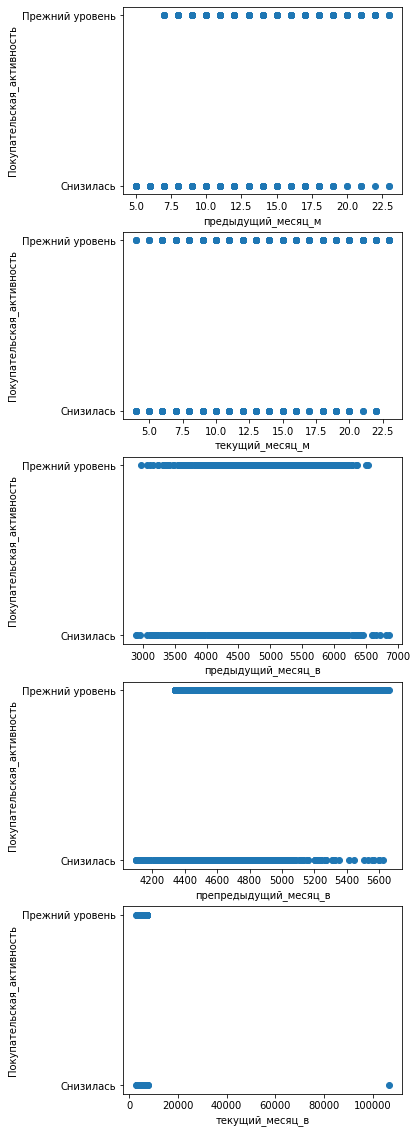

In [64]:
#Получаем кор.график по прзнакам
fig, ax = plt.subplots(5, figsize=(5, 20))
ax[0].scatter(x = df_full['предыдущий_месяц_м'], y = df_full['Покупательская_активность'])
ax[0].set_xlabel("предыдущий_месяц_м")
ax[0].set_ylabel("Покупательская_активность")

ax[1].scatter(x = df_full['текущий_месяц_м'], y = df_full['Покупательская_активность'])
ax[1].set_xlabel("текущий_месяц_м")
ax[1].set_ylabel("Покупательская_активность")

ax[2].scatter(x = df_full['предыдущий_месяц_в'], y = df_full['Покупательская_активность'])
ax[2].set_xlabel("предыдущий_месяц_в")
ax[2].set_ylabel("Покупательская_активность")

ax[3].scatter(x = df_full['препредыдущий_месяц_в'], y = df_full['Покупательская_активность'])
ax[3].set_xlabel("препредыдущий_месяц_в")
ax[3].set_ylabel("Покупательская_активность")

ax[4].scatter(x = df_full['текущий_месяц_в'], y = df_full['Покупательская_активность'])
ax[4].set_xlabel("текущий_месяц_в")
ax[4].set_ylabel("Покупательская_активность")

plt.show();

Есть мультиколлинеарность между двумя признаками 'препредыдущий_месяц_в' и 'текущий_месяц_в'. Оба признака важны. Пока что оставляю оба. Посмотрим как будет проявлять модель во время обучения.

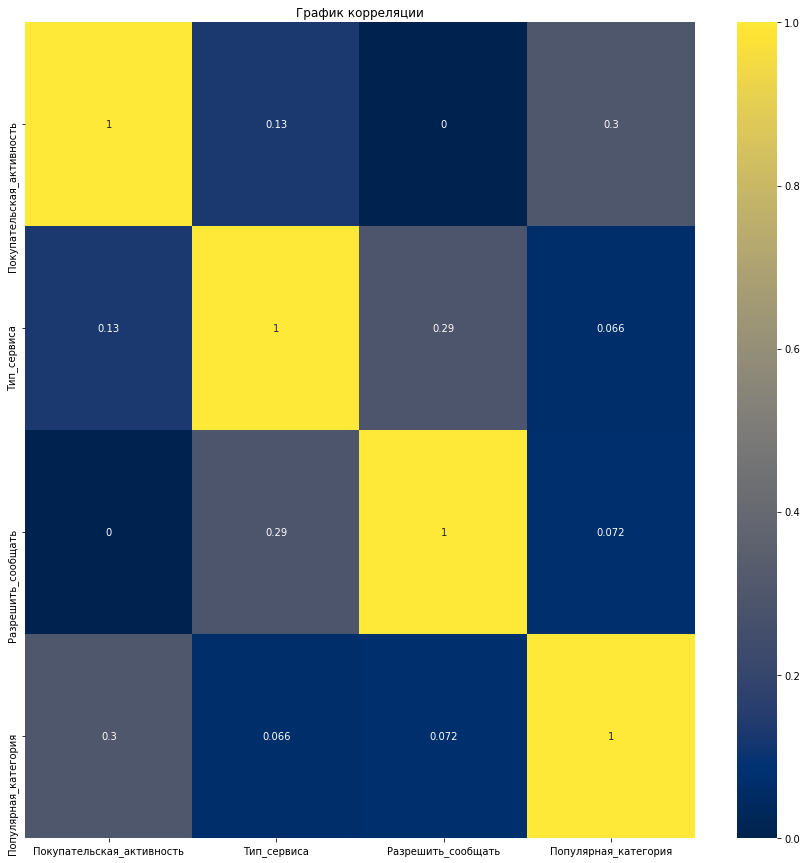

In [65]:
#Получаем кор.график по прзнакам
df_phik = df_full[['Покупательская_активность','Тип_сервиса','Разрешить_сообщать','Популярная_категория']]
plt.figure(figsize=(15, 15))
sns.heatmap(df_phik.phik_matrix(verbose=False), annot=True, cmap='cividis')
plt.title('График корреляции');

Между строковыми признаками нет мультиколлинеарности. Корреляция между признаком "Разрешить_сообщать" и целевым 0, посмотрим метрики с признаком и без.

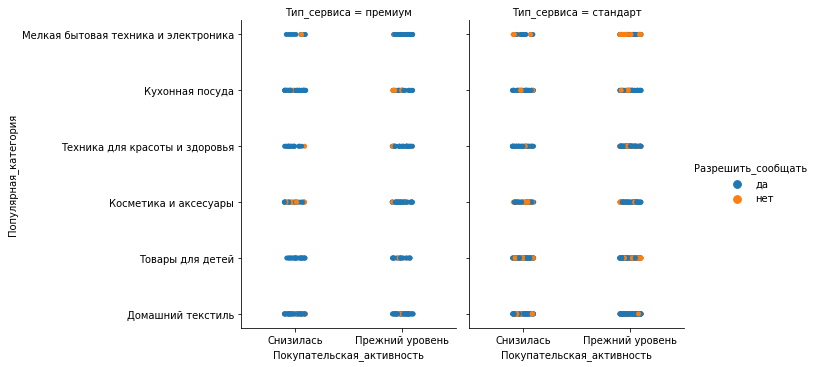

In [111]:
#Строим график по категориальным признакам
sns.catplot(data=df_full, x="Покупательская_активность", y="Популярная_категория",hue='Разрешить_сообщать',col='Тип_сервиса')

## Использование пайплайнов

In [112]:
df_full.sample(5)

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                
215439                 Снизилась     премиум                нет   
216192           Прежний уровень    стандарт                 да   
216012           Прежний уровень     премиум                 да   
216636           Прежний уровень     премиум                 да   
216299           Прежний уровень    стандарт                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                               
215439                 3.4                     5           448   
216192                 3.3                     3           641   
216012                 4.9                     3           576   
216636                 2.4                     4           996   
216299                 5.1                     4           669   

        Акционные_покупки   Популярная_категория  \
id                                                 
215439               0.28       Товары для детей   
216192               0.27  Косметика и аксесуары   
216012               0.44        Кухонная посуда   
216636               0.23        Кухонная посуда   
216299               0.16       Товары для детей   

        Средний_просмотр_категорий_за_визит  \
id                                            
215439                                    4   
216192                                    4   
216012                                    3   
216636                                    3   
216299                                    4   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215439                                   2               2                 7   
216192                                   1               1                 9   
216012                                   0               2                 9   
216636                                   4               5                 6   
216299                                   1               4                 6   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215439                   9                9              5484.0   
216192                  11                9              5387.5   
216012                  13               18              5333.5   
216636                  10               14              5644.5   
216299                   9               15              5568.0   

        препредыдущий_месяц_в  текущий_месяц_в  
id                                              
215439                 4551.0           5833.7  
216192                 4549.0           6244.2  
216012                 4771.0           5951.0  
216636                 4860.0           6454.4  
216299                 5448.0           5594.0

In [113]:
#преобразуйте 'Покупательская_активность' в категориальный бинарный признак, с помощю лямбда-функции
df_full['Покупательская_активность'] = df_full['Покупательская_активность'].apply(lambda x: 1 if x == 'Снизилась' else 0)
df_full.sample(5)

Покупательская_активность Тип_сервиса Разрешить_сообщать  \
id                                                                 
215532                          1    стандарт                 да   
216197                          0     премиум                 да   
215507                          1    стандарт                 да   
215549                          1     премиум                 да   
215401                          1     премиум                 да   

        Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
id                                                               
215532                 4.1                     4           828   
216197                 4.9                     5           406   
215507                 3.8                     3           871   
215549                 2.6                     3           683   
215401                 3.4                     5           339   

        Акционные_покупки            Популярная_категория  \
id                                                          
215532               0.35                Товары для детей   
216197               0.25                 Кухонная посуда   
215507               0.32  Техника для красоты и здоровья   
215549               0.28                Товары для детей   
215401               0.30           Косметика и аксесуары   

        Средний_просмотр_категорий_за_визит  \
id                                            
215532                                    3   
216197                                    5   
215507                                    2   
215549                                    1   
215401                                    2   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215532                                   4               4                 7   
216197                                   0               6                12   
215507                                   4               6                 7   
215549                                   5               3                 6   
215401                                   3               3                 4   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215532                   7                9              3871.5   
216197                  17               21              5307.0   
215507                  16                9              4464.0   
215549                  11               12              3781.0   
215401                  10                8              5548.5   

        препредыдущий_месяц_в  текущий_месяц_в  
id                                              
215532                 4212.0           4422.7  
216197                 5511.0           5260.2  
215507                 4969.0           4794.2  
215549                 4736.0           4315.3  
215401                 4833.0           6065.9

In [114]:
#создаём константы RANDOM_STATE и делим даные 75%,25%.25% 
RANDOM_STATE = 42
TEST_SIZE = 0.25
#Разбиваем выборку
X =  df_full.drop(['Покупательская_активность'], axis=1)
y = df_full['Покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

X_train.shape, X_test.shape,y_train.shape,y_test.shape


((972, 16), (325, 16), (972,), (325,))

In [115]:
df_segment = X_test

In [116]:
# создаём списки с названиями признаков
ohe_columns = ['Тип_сервиса','Разрешить_сообщать']
ord_columns = ['Популярная_категория']
num_columns = ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес','Длительность',
               'Акционные_покупки','Средний_просмотр_категорий_за_визит','Неоплаченные_продукты_штук_квартал'
               ,'Ошибка_сервиса','Страниц_за_визит','предыдущий_месяц_м','текущий_месяц_м','предыдущий_месяц_в'
              ,'препредыдущий_месяц_в','текущий_месяц_в']
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
     ,('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))])

ohe_pipe,ord_pipe

(Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                 ('ohe',
                  OneHotEncoder(drop='first', handle_unknown='ignore',
                                sparse_output=False))]),
 Pipeline(steps=[('simpleImputer_before_ord',
                  SimpleImputer(strategy='most_frequent')),
                 ('ord',
                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=nan)),
                 ('simpleImputer_after_ord',
                  SimpleImputer(strategy='most_frequent'))]))

In [117]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)], 
    remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([('preprocessor', data_preprocessor)
                       ,('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

# словарь для моделей
param_grid = [{'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)]
               ,'models__max_depth': range(2,5)
               ,'models__max_features': range(2,5)
               ,'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
              
              {'models': [KNeighborsClassifier()]
               ,'models__n_neighbors': range(2,5)
               ,'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
              
              {'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')]
               ,'models__C': range(1,5)
               ,'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
              
              {'models': [SVC(random_state=RANDOM_STATE, probability=True)]
               ,'models__kernel':['rbf','sigmoid','linear']
               ,'models__C': range(1,5)
               ,'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Тип_сервиса', 'Разрешить_сообщать']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent'...
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Популярная_категория']),
                                ('num', MinMaxScaler(),
                                 ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес',
                                  'Длительность', 'Акционные_покупки',
                                  'Средний_просмотр_категорий_за_визит',
                                  'Неоплаченные_продукты_штук_квартал',
                                  'Ошибка_сервиса', 'Страниц_за_визит',
                                  'предыдущий_месяц_м', 'текущий_месяц_м',
                                  'предыдущий_месяц_в', 'препредыдущий_месяц_в',
                                  'текущий_месяц_в'])])

In [118]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   Simple...
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'предыдущий_месяц_м',
                                                   'текущий_месяц_м',
                                                   'предыдущий_месяц_в',
                                                   'препредыдущий_месяц_в',
                                                   'текущий_месяц_в'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

In [119]:
randomized_search = RandomizedSearchCV(pipe_final, param_grid, cv=5,scoring='roc_auc'
                                       ,random_state=RANDOM_STATE,n_jobs=-1)
randomized_search

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Тип_сервиса',
                                                                                'Разрешить_сообщать']),
                                                                              ('ord',
                                                                               Pipeline(steps=[...
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'models__kernel': ['rbf', 'sigmoid',
                                                            'linear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [120]:
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)



Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип_сервиса',
                                                   'Разрешить_сообщать']),
                                                 ('ord',
                                          

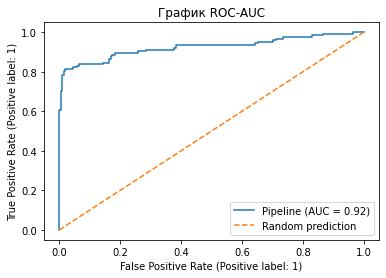

In [121]:
RocCurveDisplay.from_estimator(randomized_search.best_estimator_,X_test,y_test)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

## Вывод 

Выбрала roc_auc, поскольку облегчает работу с парогами,есть большая разница между значениями целевого признака.

In [122]:
# В best_model будет храниться наш пайплайн
best_model = randomized_search.best_estimator_
svc_model = best_model.named_steps['models']
svc_model

SVC(C=2, probability=True, random_state=42)

In [123]:
X_train = best_model.named_steps['preprocessor'].fit_transform(X_train)
X_test = best_model.named_steps['preprocessor'].transform(X_test)

In [124]:
explainer = shap.Explainer(svc_model.predict_proba, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 326it [04:43,  1.12it/s]                         


In [76]:
# Достаем из ColumnTransformer названия OHE признаков
# и объединяем их с назвниями численных признаков
# в том порядке котором они подавались в pipeline
features_out = best_model.named_steps['preprocessor'].transformers_[0][1][1].get_feature_names_out().tolist()+ord_columns +num_columns
features_out

['x0_стандарт',
 'x1_нет',
 'Популярная_категория',
 'Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'предыдущий_месяц_м',
 'текущий_месяц_м',
 'предыдущий_месяц_в',
 'препредыдущий_месяц_в',
 'текущий_месяц_в']

In [77]:
X_test.shape

(322, 16)

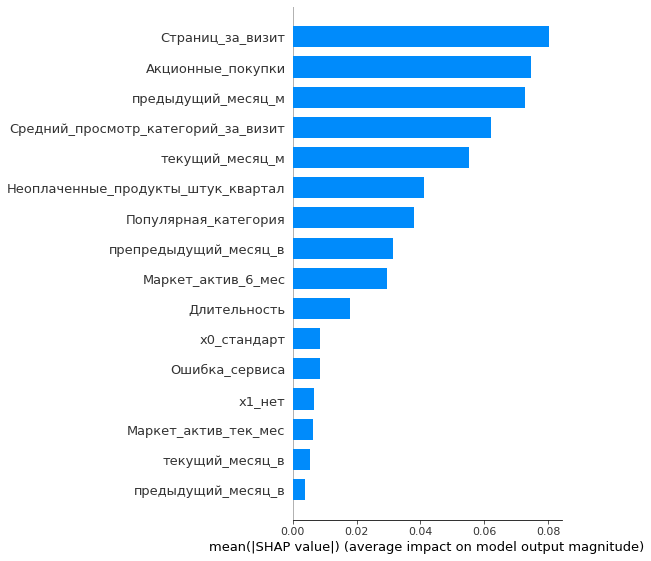

In [78]:
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar",
                  feature_names=features_out)

## Вывод

Для модели мало-значимые признаки сумма выручки текущем месяце, тип сервиса, маркетинговая октивность в текущем месяце, сумма выручки предыдушего месяца,доп. предложении по сообщениям. Может быть из за того, что была корр. зависимость между выручкой теущего месяца и предпредыдущего месяца, признак выгоды текущего месяца стал мало значимым.

Силнее всего влияют признаки - страница за визит,минуты проведённые на сайте в предыдущем месяце,акционные покупки,средний просмотр категории за визит,минуты проведённые на сайте в текущем месяце.

Исходя из графика можно выбрать признаки, кторые сильно влияют на модель и посмотреть  на их взаимосвязь.

Есть предположение, что много из клиентов долго ищут акционные продукты на сайте, по этому и в тройке лидеров сильно влияюших признаков входят - страница за визит,минуты проведённые на сайте в предыдущем месяце,акционные покупки

## Сегментация покупателей 

In [79]:
df_segment.sample(5)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215658    стандарт                нет                 5.6   
216162     премиум                 да                 5.5   
216313     премиум                нет                 4.2   
215942     премиум                 да                 4.1   
215753     премиум                 да                 5.5   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215658                     5           163               0.36   
216162                     4           631               0.26   
216313                     4           639               0.30   
215942                     4           575               0.25   
215753                     5           191               0.17   

                  Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                            
215658                Товары для детей                                    1   
216162                Товары для детей                                    4   
216313           Косметика и аксесуары                                    2   
215942  Техника для красоты и здоровья                                    5   
215753           Косметика и аксесуары                                    6   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215658                                   3               3                 2   
216162                                   1               4                 9   
216313                                   0               3                 7   
215942                                   3               5                13   
215753                                   0               4                 8   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215658                   9               10              5937.0   
216162                  13               18              5259.5   
216313                  14               13              4714.0   
215942                  15               19              4139.0   
215753                  15               15              4395.5   

        препредыдущий_месяц_в  текущий_месяц_в  
id                                              
215658                 4680.0           5788.8  
216162                 5255.0           5385.6  
216313                 4771.0           4794.6  
215942                 4629.0           3843.9  
215753                 4808.0           4168.0

In [80]:
df_segment.shape

(322, 16)

In [81]:
#Добовляем аероятность 1ого класса к имеющим данным
df_segment['вероятность'] = svc_model.predict_proba(X_test)[:,1]
df_segment

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215942     премиум                 да                 4.1   
216610    стандарт                нет                 4.2   
215744    стандарт                 да                 1.7   
216408     премиум                нет                 4.9   
216338    стандарт                 да                 6.1   
...            ...                ...                 ...   
215870    стандарт                 да                 5.7   
216244     премиум                нет                 4.2   
216355    стандарт                 да                 5.1   
215753     премиум                 да                 5.5   
216357    стандарт                нет                 4.1   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215942                     4           575               0.25   
216610                     4           964               0.30   
215744                     5           439               0.31   
216408                     4           424               0.30   
216338                     5           360               0.28   
...                      ...           ...                ...   
215870                     4           803               0.25   
216244                     3           452               0.25   
216355                     4           433               0.14   
215753                     5           191               0.17   
216357                     4           184               0.99   

                  Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                            
215942  Техника для красоты и здоровья                                    5   
216610  Техника для красоты и здоровья                                    4   
215744                 Кухонная посуда                                    1   
216408               Домашний текстиль                                    4   
216338  Техника для красоты и здоровья                                    5   
...                                ...                                  ...   
215870               Домашний текстиль                                    5   
216244           Косметика и аксесуары                                    4   
216355                Товары для детей                                    4   
215753           Косметика и аксесуары                                    6   
216357                 Кухонная посуда                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215942                                   3               5                13   
216610                                   0               6                 6   
215744                                   5               2                 1   
216408                                   4               9                11   
216338                                   3               6                 9   
...                                    ...             ...               ...   
215870                                   4               6                 5   
216244                                   2               4                10   
216355                                   1               4                 9   
215753                                   0               4                 8   
216357                                   4               5                 7   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215942                  15               19              4139.0   
216610                  12               21              4359.0   
215744                   6    

In [82]:
#Соединяем таблицу прибыли
df_segment_all = df_segment.join(df_money_else,on='id')
df_segment_all.sort_values(by='вероятность',ascending=False)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215409     премиум                 да                 1.4   
215607     премиум                 да                 3.0   
215538     премиум                 да                 1.5   
215670    стандарт                 да                 4.1   
215744    стандарт                 да                 1.7   
...            ...                ...                 ...   
216588    стандарт                нет                 4.3   
216282     премиум                 да                 5.2   
216048    стандарт                 да                 5.2   
216570    стандарт                нет                 4.7   
215863    стандарт                нет                 4.6   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215409                     4           857               0.95   
215607                     3           862               0.94   
215538                     5           788               0.89   
215670                     4           490               0.98   
215744                     5           439               0.31   
...                      ...           ...                ...   
216588                     4           166               0.13   
216282                     3           347               0.16   
216048                     5           153               0.14   
216570                     5           769               0.14   
215863                     4           900               0.16   

                        Популярная_категория  \
id                                             
215409                       Кухонная посуда   
215607                 Косметика и аксесуары   
215538                      Товары для детей   
215670                       Кухонная посуда   
215744                       Кухонная посуда   
...                                      ...   
216588        Техника для красоты и здоровья   
216282        Техника для красоты и здоровья   
216048        Техника для красоты и здоровья   
216570        Техника для красоты и здоровья   
215863  Мелкая бытовая техника и электроника   

        Средний_просмотр_категорий_за_визит  \
id                                            
215409                                    3   
215607                                    1   
215538                                    1   
215670                                    3   
215744                                    1   
...                                     ...   
216588                                    4   
216282                                    3   
216048                                    6   
216570                                    4   
215863                                    5   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215409                                   4               5                 5   
215607                                   5               2                 8   
215538                                   4               4                 4   
215670                                   7               3                 2   
215744                                   5               2                 1   
...                                    ...             ...               ...   
216588                                   1               3                14   
216282                                   1               3                11   
216048                                   3               3                 9   
216570                                   1               2                15   
215863                                   0               8                 8   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                    

In [83]:
df_segment_all.describe()

Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count          322.000000            322.000000    322.000000   
mean             4.300000              4.009317    625.534161   
std              1.026624              0.681240    246.894229   
min              0.900000              3.000000    121.000000   
25%              3.800000              4.000000    448.250000   
50%              4.300000              4.000000    632.500000   
75%              5.100000              4.000000    830.500000   
max              6.600000              5.000000   1048.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         322.000000                           322.000000   
mean            0.328323                             3.372671   
std             0.252493                             1.379963   
min             0.110000                             1.000000   
25%             0.170000                             2.000000   
50%             0.250000                             3.000000   
75%             0.300000                             4.000000   
max             0.990000                             6.000000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
count                          322.000000      322.000000        322.000000   
mean                             2.760870        4.279503          8.080745   
std                              1.989526        1.985025          3.885391   
min                              0.000000        0.000000          1.000000   
25%                              1.000000        3.000000          5.000000   
50%                              2.500000        4.000000          8.000000   
75%                              4.000000        6.000000         11.000000   
max                              9.000000        9.000000         19.000000   

       предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
count          322.000000       322.000000          322.000000   
mean            13.381988        13.288820         5008.833851   
std              3.860502         4.205078          705.899536   
min              5.000000         4.000000         3137.000000   
25%             11.000000        10.000000         4571.125000   
50%             13.000000        13.000000         5034.750000   
75%             16.000000        16.000000         5518.250000   
max             23.000000        23.000000         6809.000000   

       препредыдущий_месяц_в  текущий_месяц_в  вероятность     Прибыль  
count             322.000000       322.000000   322.000000  322.000000  
mean             4847.204969      5585.178571     0.384547    3.990217  
std               346.460521      5727.580154     0.376618    1.015061  
min              4102.000000      3083.700000     0.004142    1.400000  
25%              4583.500000      4718.125000     0.059492    3.320000  
50%              4840.500000      5227.850000     0.182941    4.070000  
75%              5101.500000      5869.200000     0.818751    4.660000  
max              5641.000000    106862.200000     0.999987    6.780000

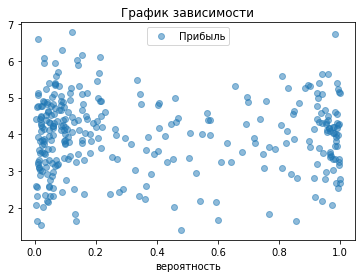

In [84]:
#Строим график по прибыли и вероятностю
df_segment_all.plot(x='вероятность',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

После изучении таблицы выбираю клиентов, у каторых вероятность снижении активность больше 0.6 и доход выше 3-ух.

In [85]:
#Сегментируем клиентов по высокой вероятностью снижением активности и 
df_segment_all = df_segment_all[(df_segment_all['вероятность']>=0.6) & (df_segment_all['Прибыль']>= 3)]
df_segment_all.sort_values(by='вероятность',ascending=False)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215607     премиум                 да                 3.0   
215670    стандарт                 да                 4.1   
215744    стандарт                 да                 1.7   
215459     премиум                 да                 4.1   
215723     премиум                 да                 3.8   
...            ...                ...                 ...   
215491    стандарт                 да                 1.7   
215451    стандарт                 да                 3.9   
216356    стандарт                 да                 5.5   
216510     премиум                 да                 4.9   
215572    стандарт                 да                 3.5   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215607                     3           862               0.94   
215670                     4           490               0.98   
215744                     5           439               0.31   
215459                     4           768               0.94   
215723                     4           444               0.94   
...                      ...           ...                ...   
215491                     4           298               0.39   
215451                     3          1048               0.22   
216356                     4          1022               0.91   
216510                     5           723               0.91   
215572                     4           676               0.32   

                        Популярная_категория  \
id                                             
215607                 Косметика и аксесуары   
215670                       Кухонная посуда   
215744                       Кухонная посуда   
215459                       Кухонная посуда   
215723                       Кухонная посуда   
...                                      ...   
215491                     Домашний текстиль   
215451                      Товары для детей   
216356  Мелкая бытовая техника и электроника   
216510  Мелкая бытовая техника и электроника   
215572        Техника для красоты и здоровья   

        Средний_просмотр_категорий_за_визит  \
id                                            
215607                                    1   
215670                                    3   
215744                                    1   
215459                                    2   
215723                                    2   
...                                     ...   
215491                                    6   
215451                                    4   
216356                                    3   
216510                                    2   
215572                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215607                                   5               2                 8   
215670                                   7               3                 2   
215744                                   5               2                 1   
215459                                   8               7                 6   
215723                                   4               3                 2   
...                                    ...             ...               ...   
215491                                   3               6                 4   
215451                                   5               4                 5   
216356                                   0               3                11   
216510                                   4               6                 9   
215572                                   7               3                 3   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                    

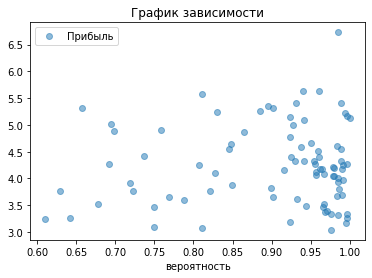

SpearmanrResult(correlation=-0.025599898014607773, pvalue=0.813925552845733)

In [86]:
#Строим график по прибыли и вероятностю
df_segment_all.plot(x='вероятность',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();
stats.spearmanr(df_segment_all['вероятность'], df_segment_all['Прибыль'])

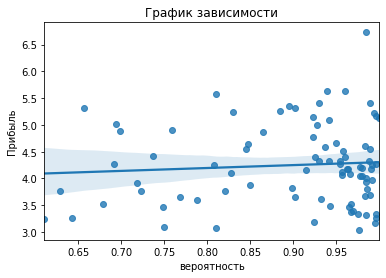

In [87]:
#Строим график по прибыли и вероятностю
sns.regplot(x="вероятность", y="Прибыль", data=df_segment_all)
plt.title('График зависимости')
plt.show()

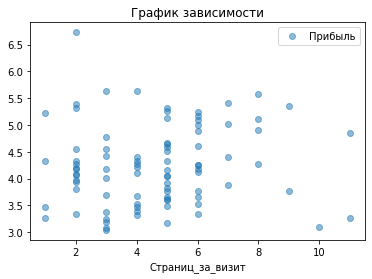

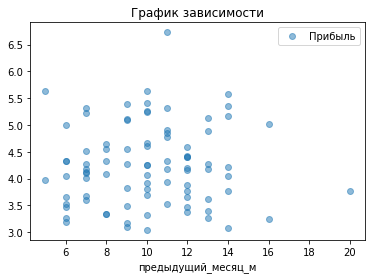

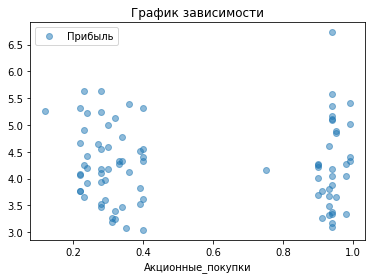

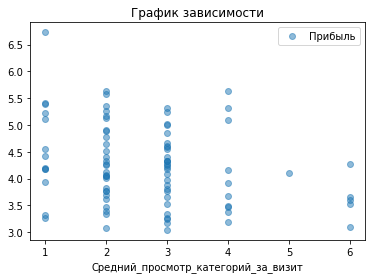

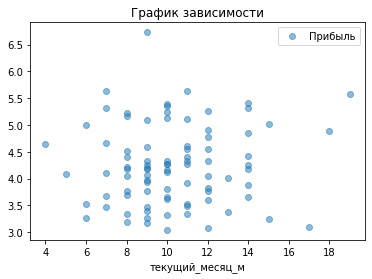

In [88]:
#Строим график по популярным категориям
df_segment_all.plot(x='Страниц_за_визит',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

df_segment_all.plot(x='предыдущий_месяц_м',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

df_segment_all.plot(x='Акционные_покупки',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

df_segment_all.plot(x='Средний_просмотр_категорий_за_визит',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

df_segment_all.plot(x='текущий_месяц_м',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

В основном высокий прибыль есть от тех клиентов, у каторых в среднем от 2-4 страниц за визит,от 8-11 мин проведённого на сайте в предыдущем месяце, от 10-12 мин. проведённого на сайте в текущем месяце. У большинства  клиентов 30 % покупки акционные, средний просмотр 2 категории.

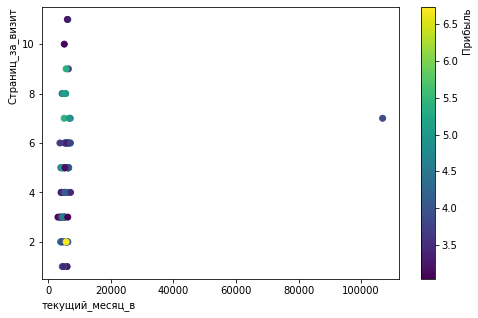

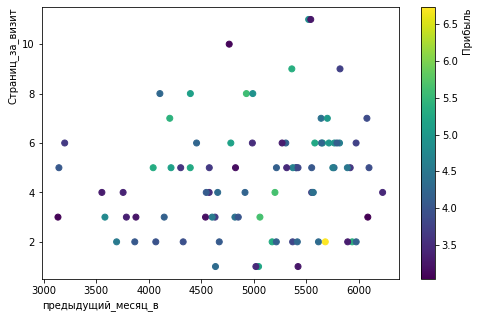

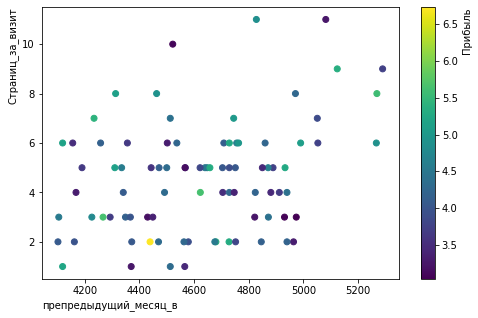

In [89]:
#Строим график по популярным категориям,текущим месяцем и прибылью
fig, ax = plt.subplots(figsize=(8,5))

sc = ax.scatter(df_segment_all['текущий_месяц_в'],df_segment_all['Страниц_за_визит'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Страниц_за_визит', loc='top')
ax.set_xlabel('текущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['предыдущий_месяц_в'],df_segment_all['Страниц_за_визит'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Страниц_за_визит', loc='top')
ax.set_xlabel('предыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['препредыдущий_месяц_в'],df_segment_all['Страниц_за_визит'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Страниц_за_визит', loc='top')
ax.set_xlabel('препредыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()



По распределению видно, в текущем месяце страницы за визит у клиентов стало по больше. разница между предыдущем месяце и текущем не большая.

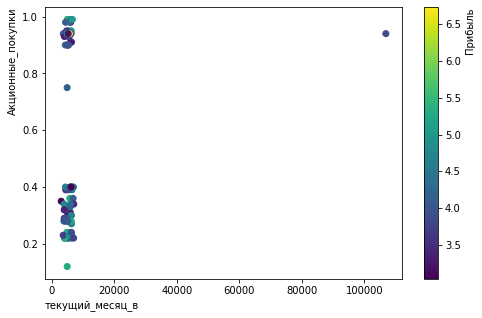

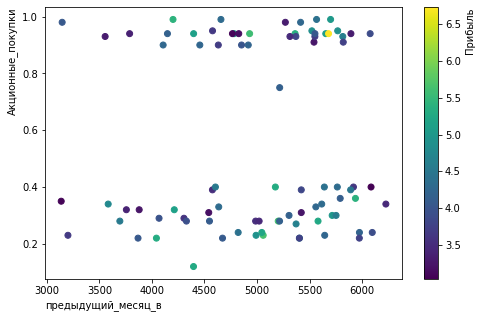

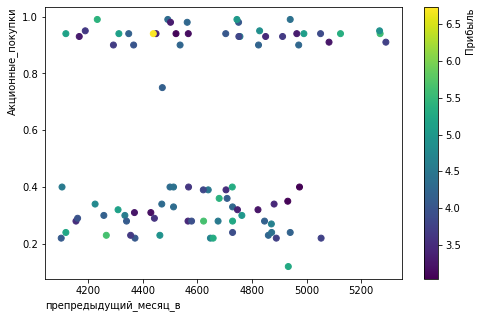

In [90]:
#Строим график по популярным категориям,текущим месяцем и прибылью
fig, ax = plt.subplots(figsize=(8,5))

sc = ax.scatter(df_segment_all['текущий_месяц_в'],df_segment_all['Акционные_покупки'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Акционные_покупки', loc='top')
ax.set_xlabel('текущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['предыдущий_месяц_в'],df_segment_all['Акционные_покупки'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Акционные_покупки', loc='top')
ax.set_xlabel('предыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['препредыдущий_месяц_в'],df_segment_all['Акционные_покупки'], c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Акционные_покупки', loc='top')
ax.set_xlabel('препредыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()


По графику видно, что в текущем месяце стало больше акционных покупок.

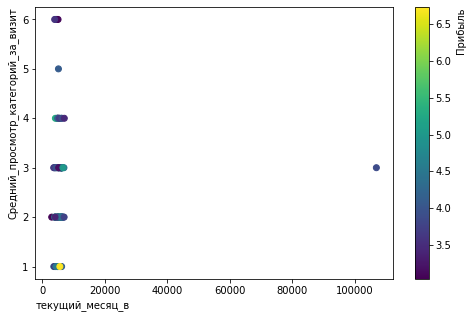

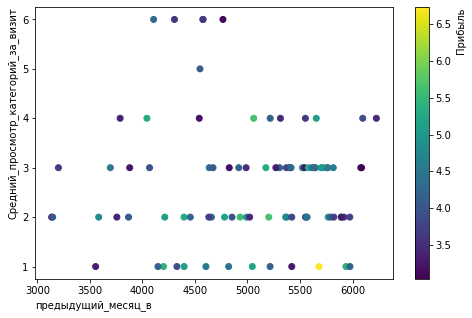

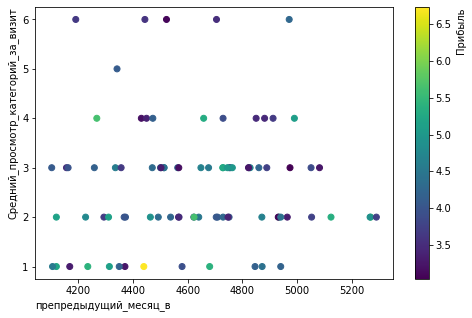

In [91]:
#Строим график по популярным категориям,текущим месяцем и прибылью
fig, ax = plt.subplots(figsize=(8,5))

sc = ax.scatter(df_segment_all['текущий_месяц_в'],df_segment_all['Средний_просмотр_категорий_за_визит'],
                c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Средний_просмотр_категорий_за_визит', loc='top')
ax.set_xlabel('текущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['предыдущий_месяц_в'],df_segment_all['Средний_просмотр_категорий_за_визит'],
                c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Средний_просмотр_категорий_за_визит', loc='top')
ax.set_xlabel('предыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sc = ax.scatter(df_segment_all['препредыдущий_месяц_в'],df_segment_all['Средний_просмотр_категорий_за_визит'],
                c=df_segment_all['Прибыль'])
figsize=(30,30)
ax.set_ylabel('Средний_просмотр_категорий_за_визит', loc='top')
ax.set_xlabel('препредыдущий_месяц_в', loc='left')
cbar = fig.colorbar(sc)
cbar.set_label("Прибыль", loc='top')

plt.show()


Такая же ситуация с просмотрами категории. 

In [92]:
#Выводим на экран сумму выручки за текущий месяц
df_segment_all['текущий_месяц_в'].sum()

570431.9

In [93]:
 #Выводим на экран сумму выручки за предыдущий месяц
df_segment_all['предыдущий_месяц_в'].sum()

435900.0

In [94]:
#Выводим на экран сумму выручки за предпредыдущий месяц
df_segment_all['препредыдущий_месяц_в'].sum()

402428.0

In [95]:
pd.options.mode.chained_assignment = None
#Добовляем в таблицу столбец 'разница между текущим и предыдущим месяцем' 
df_segment_all['разница_т_п'] = df_segment_all['текущий_месяц_в'] - df_segment_all['предыдущий_месяц_в'].to_list()
df_segment_all['разница_т_п']
df_segment_all.sort_values(by='разница_т_п',ascending=True).head(10)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215586     премиум                 да                 4.1   
216421     премиум                 да                 4.1   
215441    стандарт                 да                 4.1   
215349     премиум                 да                 4.4   
215631    стандарт                нет                 4.6   
215721    стандарт                 да                 3.9   
215469     премиум                 да                 4.1   
216564    стандарт                 да                 5.6   
215503    стандарт                 да                 2.4   
215658    стандарт                нет                 5.6   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215586                     4           557               0.94   
216421                     3           302               0.95   
215441                     4           922               0.29   
215349                     4           819               0.75   
215631                     5           345               0.28   
215721                     4           906               0.33   
215469                     3           813               0.22   
216564                     4           342               0.94   
215503                     5           638               0.24   
215658                     5           163               0.36   

                  Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                            
215586  Техника для красоты и здоровья                                    1   
216421                Товары для детей                                    2   
215441                Товары для детей                                    6   
215349                Товары для детей                                    4   
215631                Товары для детей                                    2   
215721                Товары для детей                                    3   
215469               Домашний текстиль                                    3   
216564                 Кухонная посуда                                    2   
215503               Домашний текстиль                                    1   
215658                Товары для детей                                    1   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215586                                   8               3                 3   
216421                                   2               2                 6   
215441                                   7               1                 5   
215349                                   4               2                 5   
215631                                   2               1                 1   
215721                                   1               3                 1   
215469                                   3               4                 5   
216564                                   7               5                 8   
215503                                   5               2                 1   
215658                                   3               3                 2   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215586                  11               14              4148.0   
216421                  13               18              5768.0   
215441                   7               12              4305.0   
215349                  12               10              5216.0   
215631                   6                7              5020.5   
215721                   6               10              4636.0   
215469                  12                8    

In [96]:
difference_cp = df_segment_all['текущий_месяц_в'].sum() - df_segment_all['предыдущий_месяц_в'].sum()
difference_cp

134531.90000000002

In [97]:
pd.options.mode.chained_assignment = None
#Добовляем в таблицу столбец 'разница между предыдущим и предпредыдущим месяцем' 
df_segment_all['разница_п_пп'] = df_segment_all['предыдущий_месяц_в'] - df_segment_all['препредыдущий_месяц_в'].to_list()
df_segment_all['разница_п_пп']
df_segment_all.sort_values(by=['разница_п_пп'],ascending=True).head(10)

Тип_сервиса Разрешить_сообщать  Маркет_актив_6_мес  \
id                                                          
215560    стандарт                 да                 3.9   
215386    стандарт                 да                 1.5   
215477    стандарт                нет                 1.7   
215414     премиум                 да                 4.0   
215704    стандарт                 да                 2.4   
215572    стандарт                 да                 3.5   
215594    стандарт                 да                 4.2   
215404    стандарт                 да                 2.4   
215384    стандарт                 да                 4.0   
215451    стандарт                 да                 3.9   

        Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
id                                                              
215560                     4           589               0.35   
215386                     3           495               0.98   
215477                     4           377               0.23   
215414                     4           768               0.32   
215704                     5           485               0.28   
215572                     4           676               0.32   
215594                     4           627               0.90   
215404                     3           699               0.94   
215384                     4          1020               0.34   
215451                     3          1048               0.22   

                  Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                            
215560                Товары для детей                                    2   
215386               Домашний текстиль                                    2   
215477                Товары для детей                                    3   
215414                 Кухонная посуда                                    2   
215704                Товары для детей                                    3   
215572  Техника для красоты и здоровья                                    3   
215594                Товары для детей                                    6   
215404               Домашний текстиль                                    4   
215384           Косметика и аксесуары                                    2   
215451                Товары для детей                                    4   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215560                                   6               4                 3   
215386                                   3               7                 5   
215477                                   3               5                 6   
215414                                   8               4                 4   
215704                                   0               3                 2   
215572                                   7               3                 3   
215594                                   9               5                 8   
215404                                   1               2                 3   
215384                                   3               8                 3   
215451                                   5               4                 5   

        предыдущий_месяц_м  текущий_месяц_м  предыдущий_месяц_в  \
id                                                                
215560                  14               12              3137.0   
215386                  14                8              3146.0   
215477                  12               14              3201.0   
215414                  13                9              3757.0   
215704                   9               12              3695.0   
215572                  16               15              3879.0   
215594                  13               10    

In [98]:
difference_pp = df_segment_all['предыдущий_месяц_в'].sum() - df_segment_all['препредыдущий_месяц_в'].sum()
difference_pp

33472.0

Разница между текущим и предыдущим месяцем поблдьше, чем между предыдущим и предпредыдущим.

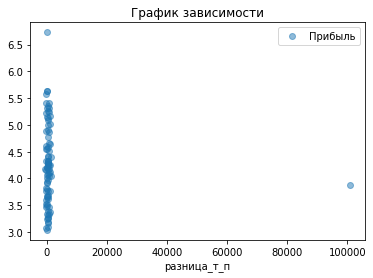

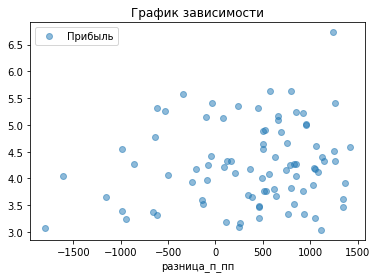

In [99]:
df_segment_all.plot(x='разница_т_п',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

df_segment_all.plot(x='разница_п_пп',y='Прибыль', style='o',alpha=0.5)
plt.title('График зависимости')
plt.show();

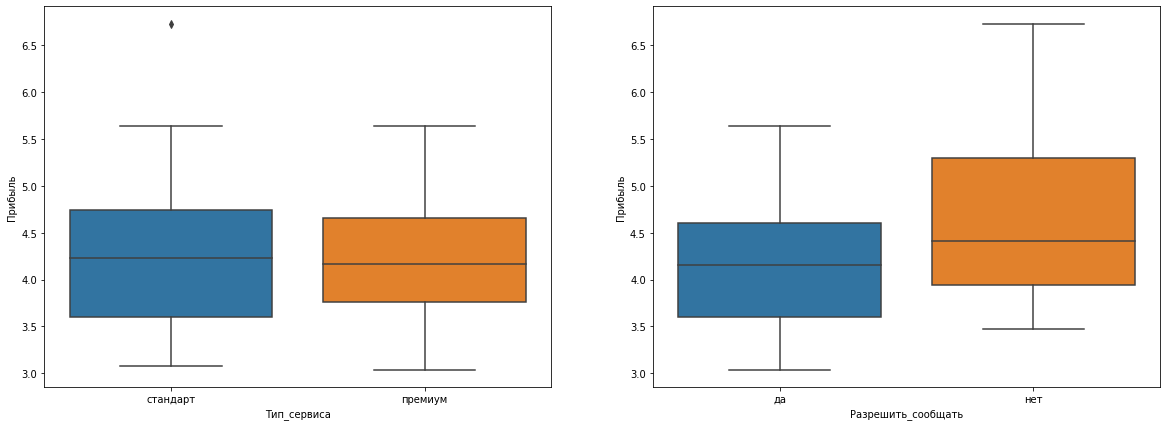

In [100]:
#Получаем ящик с усами(прибыль)
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
sns.boxplot(x=df_segment_all.Тип_сервиса,y=df_segment_all.Прибыль)
plt.subplot(1,2,2)
sns.boxplot(x=df_segment_all.Разрешить_сообщать, y=df_segment_all.Прибыль)
plt.show()

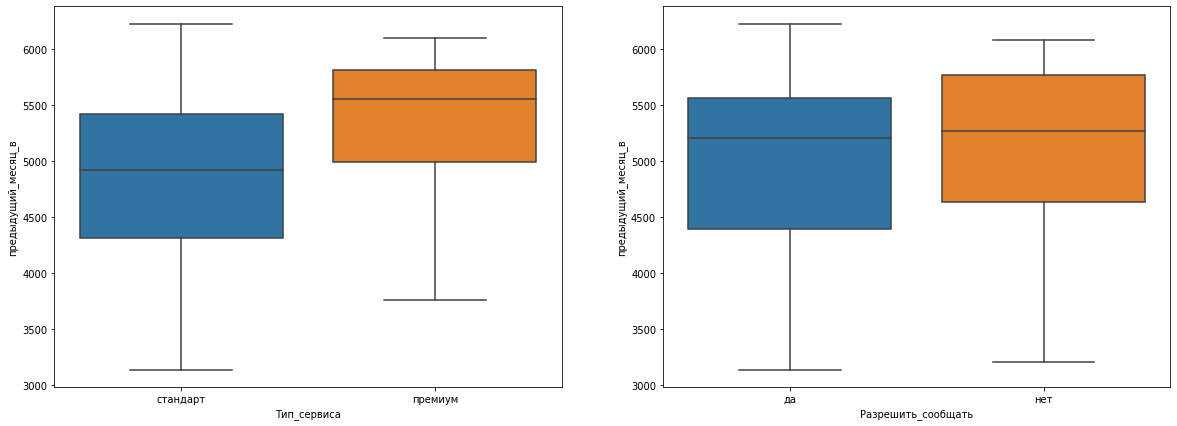

In [101]:
#Получаем ящик с усами()
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
sns.boxplot(x=df_segment_all.Тип_сервиса,y=df_segment_all.предыдущий_месяц_в)
plt.subplot(1,2,2)
sns.boxplot(x=df_segment_all.Разрешить_сообщать, y=df_segment_all.предыдущий_месяц_в)
plt.show()

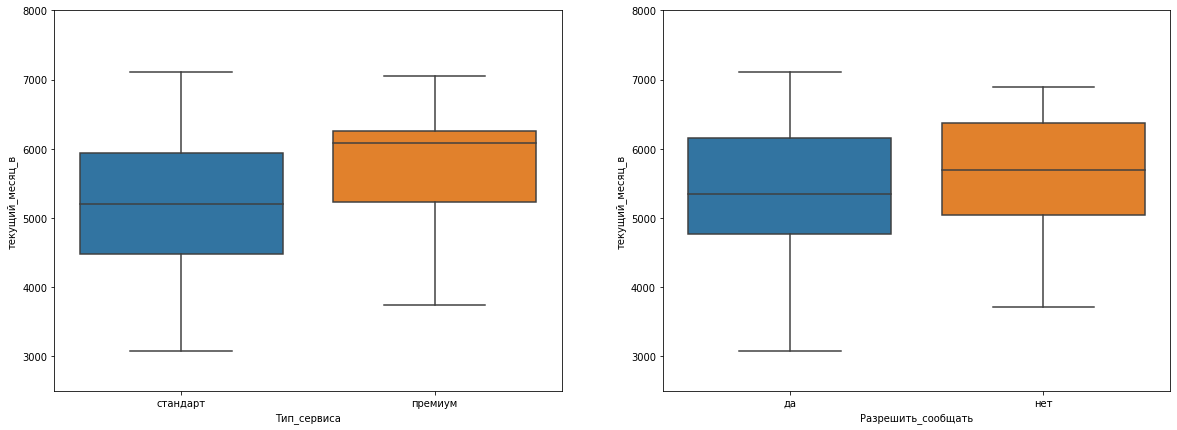

In [102]:
#Получаем ящик с усами()
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
sns.boxplot(x=df_segment_all.Тип_сервиса,y=df_segment_all.текущий_месяц_в)
plt.ylim(2500,8000)
plt.subplot(1,2,2)
sns.boxplot(x=df_segment_all.Разрешить_сообщать, y=df_segment_all.текущий_месяц_в)
plt.ylim(2500,8000)
plt.show()

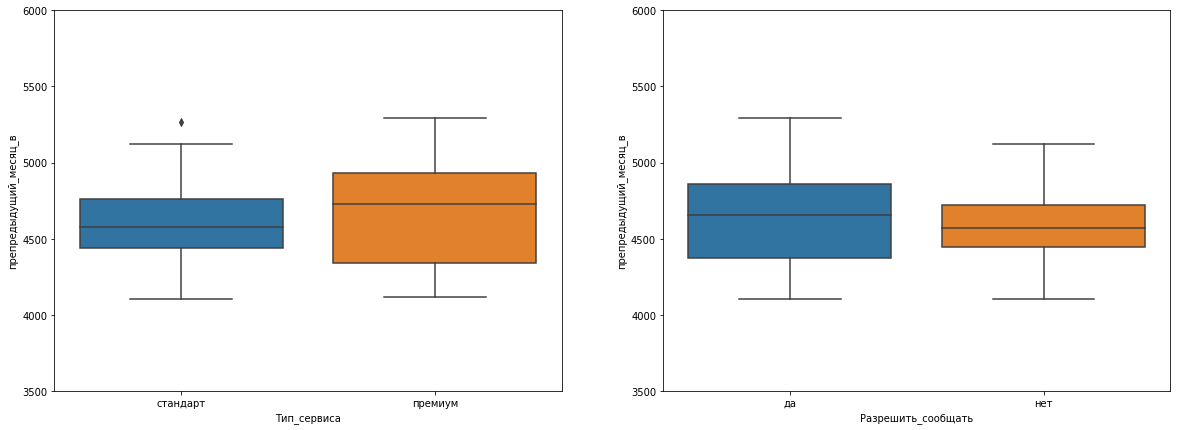

In [103]:
#Получаем ящик с усами()
plt.figure(figsize=(20, 7))

plt.subplot(1,2,1)
sns.boxplot(x=df_segment_all.Тип_сервиса,y=df_segment_all.препредыдущий_месяц_в)
plt.ylim(3500,6000)
plt.subplot(1,2,2)
sns.boxplot(x=df_segment_all.Разрешить_сообщать, y=df_segment_all.препредыдущий_месяц_в)
plt.ylim(3500,6000)
plt.show()

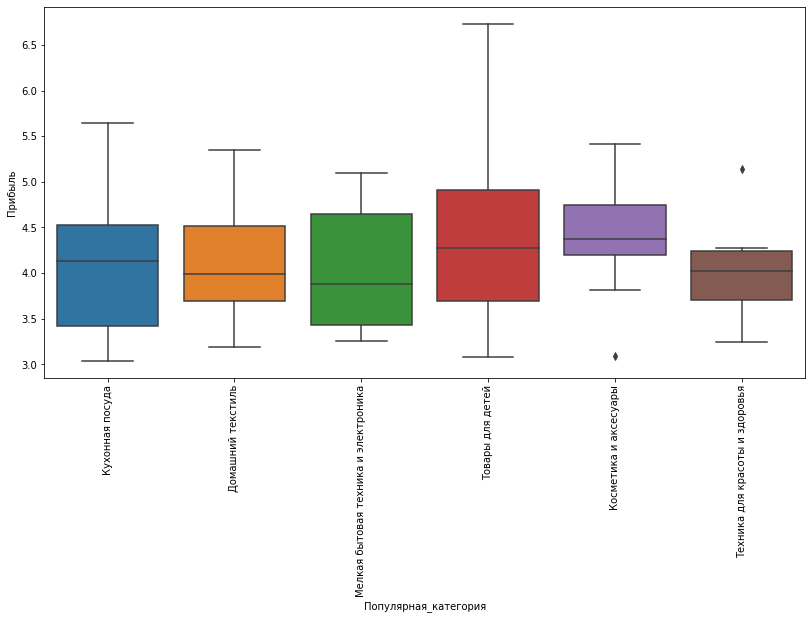

In [104]:
#Получаем ящик с усами(прибыль)
plt.figure(figsize=(30,15))

plt.subplot(2,2,2)
sns.boxplot(x=df_segment_all.Популярная_категория, y=df_segment_all.Прибыль)
plt.xticks(rotation='vertical')
plt.show()



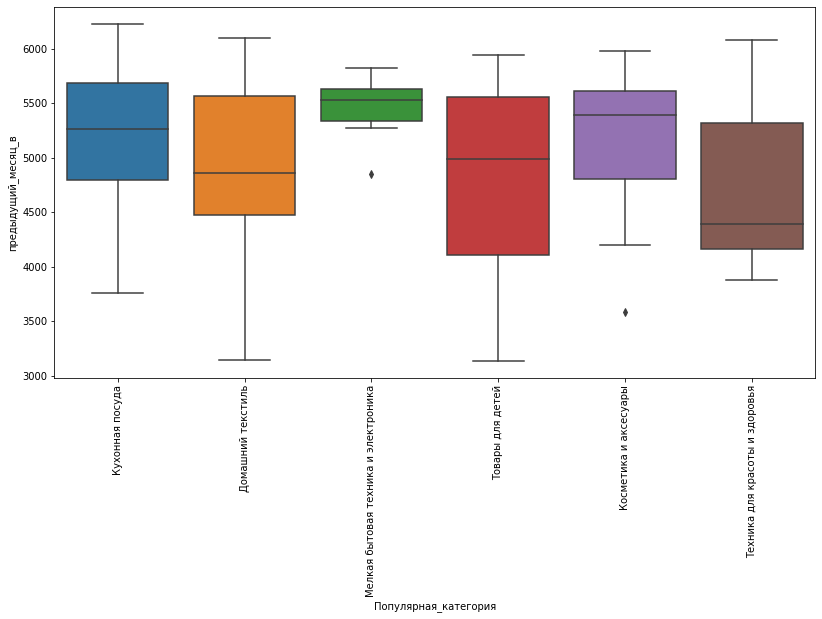

In [105]:
#Получаем ящик с усами(прибыль)
plt.figure(figsize=(30,15))

plt.subplot(2,2,2)
sns.boxplot(x=df_segment_all.Популярная_категория, y=df_segment_all.предыдущий_месяц_в)
plt.xticks(rotation='vertical')
plt.show()

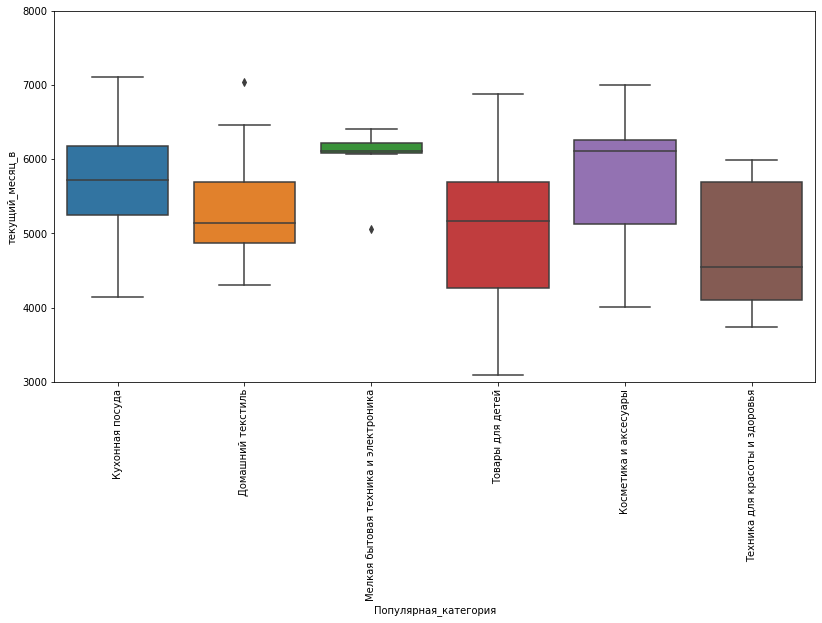

In [106]:
#Получаем ящик с усами(прибыль)
plt.figure(figsize=(30,15))

plt.subplot(2,2,2)
sns.boxplot(x=df_segment_all.Популярная_категория, y=df_segment_all.текущий_месяц_в)
plt.xticks(rotation='vertical')
plt.ylim(3000,8000)
plt.show()

## Вывод
Разделила сегмет покупателей, у каторых высокая вероятность снижении активности и прибыль 3 и выше.
По графика можно сказать, что больше внимание нужно обратить на предыдущий и текущий месяц по активности. Скорее всего есть категории по продажам, каторые отсутсвуют на сайте, покупатели долго ищут эти категории и плюс по остаткам в карзине, скорее всего есть связь, между отсуствием этих категории, из за чего заказ остаётся в карзине.
Можно посмотреть по поискам, какие категории ищут данный сегмент покупателей, и добавить эти пункты, плюс можно подумать индивидуальный подход к этим же покупателям, поставить акцент на акции и специальные предложении по покупкам(самые часты категории покупок).

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Предлагаю в данном блоке для данной категории более детально проанализировать категориальные признаки, особенно категории - я бы строил распределения или боксплоты по разным столбцам, по прибыли, по разным выручкам, по разностным характеристикам - это позволит определить проблемные категории и потенциально перспективные. И про другие категориальные признаки не забывай, тип_сервиса, разрешить сообщать и т.д

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

👍

# Общий вывод 

Загрузила данные. Во время загрузки данных поменяла запятую на точку(str-float).

Во время предоброботки данных,пропусков не было.Дубликаты были в третьем датасете по прибыли. Не удалила.

Во время анализа данных, отдельно построила графики по категориальным и количественным данным.В категориальных признаках в основном у клиентов активность в большинстве случаев на прежнем уровне,самая популярная котегория "товары для детей", стандартная подписка,есть разрешение на сообщение о различных дополнительных предложениях. 
 
 Маркет_активность в последние 6 месяцев(в графике есть несколько пиков) и на текущем месяце немного снизился, длительность в среднем 600 дней с момента регистрации, акционные покупки составляют 24% от общего числа покупок, средний просмотр от в среднем 3 категории, неоплаченные продукты в карзине от 3, ошибка сервиса в среднем 4 раза за визит, за один визит просмотривают в среднем 8 страниц.Выбросы были у Маркет_активность в последние 6 месяцев, акционные покупи и неоплаченные продукты в корзине. В признаке выручки по преиодам  и прибыли тоже были выбросы. Выбросы не удалила.Решила, что можно выбрать метрику более стабильную при выбросах и посмотреть на результаты МО.
 
 Поменяла индекс датафреймов на 'id' клиентов, разделила таблицы периодов просмотров и выручки на текущий, предыдущий и предпредыдущий период. Потом объединила все три таблицы по методу join.
 
 Провела корр. анализ по спирману по количественным признакам.Была мультиколлинеарность между двумя признаками 'препредыдущий_месяц_в' и 'текущий_месяц_в'. Оба признака важны,оба оставила. После МО можно было сделать выводы по этим признакам.
 
 Провела корр.анализ по фику по категориальным признакам.Между строковыми признаками нет мультиколлинеарности. Корреляция между признаком "Разрешить_сообщать" и целевым 0. Не удалила.Можно сделать вывод после получении метрики с признаком и без..
 
 Разделила данные на тестовые и тренировочные выборки. Создала пайплайн. В пайплайне кодировала кат. признаки по OHE и ORD. Маштабировала количественные признаки по MinMax и StandartScaller.
 В конце МО пайплайн выдал как лучшую модель и метрику SVC(C=2, probability=True, random_state=42), ROC_AUC 0.9003667138212592.
 
 После по SHAP получила таблицу важности признаков. По важности лидируют страница за визит,минуты проведённые на сайте в предыдущем месяце,акционные покупки,средний просмотр категории за визит,минуты проведённые на сайте в текущем месяце.
 
 После сделала график по вероятности снижении активности и и прибыли от покупателей. Создала отдельный сегмент по клиентам, где риск снижения активности более 0.6 и прибыль выше 3х. По графикам видно было,что распределение равномерное. 
 
  По графикам можно сказать, что больше внимание нужно обратить на предыдущий и текущий месяц по активности. Скорее всего есть категории по продажам, каторые отсутсвуют на сайте,или в которых нет конкретных пунктов для покупки.К примеру, можно увеличить список продаж по малой бытовой технике. покупатели долго ищут эти категории и плюс по остаткам в карзине, скорее всего есть связь, между отсуствием этих категории, из за чего заказ остаётся в карзине. Можно посмотреть по поискам, какие категории ищут данный сегмент покупателей, и добавить эти пункты, плюс можно подумать индивидуальный подход к этим же покупателям, поставить акцент на акции и специальные предложении по покупкам(самые часты категории покупок).

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Вывод хороший, полный, молодец. Не забудь дополнить его после внесения правок